# **Project Name**    -

# **Zomato Restaurant Clustering and Sentiment Analysis**

##### **Project Type**    - UnSupervised Machine Learning
##### **Contribution**    - Individual
##### **Team Member 1 -** Sumit Pathade

# **Project Summary -**

This project entailed the utilization of advanced data analytics techniques to gain a deeper understanding of the restaurants and customer feedback on the popular online food delivery platform, Zomato.

The data procured included information such as the restaurant's name, location, cuisines, average cost for two, ratings, and user reviews.

Subsequently, I embarked on the task of data cleaning and preprocessing, which involved the elimination of duplicate entries, addressing missing values, and transforming the data into a format amenable to analysis.

The next step in the project was the implementation of clustering on the restaurant data through the use of the k-means algorithm. The objective of the clustering was to group similar restaurants together and discern patterns within the data. The features employed for the clustering process included the restaurant's location, cuisines, and average cost for two. The number of clusters was determined by utilizing the elbow method.

I then proceeded to conduct sentiment analysis on the user reviews to gain a comprehensive understanding of the overall sentiment towards the restaurants. Certain libraries were utilized to classify the reviews as positive, negative, or neutral. Additionally, I extracted the most recurrent words utilized in the reviews and visualized them through the creation of word clouds.

The outcome of the analysis revealed that the restaurants within the city were grouped into five clusters based on their location, cuisines, and average cost for two. The sentiment analysis uncovered that, generally, customers held a positive sentiment towards the restaurants.

In conclusion, this project exemplifies the utility of clustering and sentiment analysis in gaining a more profound comprehension of restaurant data on Zomato. The insights procured from the analysis can be of immense benefit to both restaurants and customers in making informed decisions. Furthermore, the project can be extended to other cities or even countries to gain insight into the eating habits and preferences of individuals in different regions.

# **GitHub Link -**

https://github.com/sumit021094/UnSupervised_ML_Zomato_Restaurant_Clustering_and_Sentiment_Analysis/tree/main

# **Problem Statement**


The problem statement for this project is to analyze and understand the restaurant industry in India by utilizing data from the Indian restaurant aggregator and food delivery start-up, Zomato. The project aims to gain insights into the sentiments of customer reviews, cluster Zomato restaurants into different segments, and analyze the data to make useful conclusions in the form of visualizations. The data analyzed includes information on cuisine, costing, and customer reviews. The project aims to assist customers in finding the best restaurant in their locality and aid the company in identifying areas for growth and improvement in the industry. Additionally, the project aims to use the data for sentiment analysis and identifying critics in the industry through the metadata of reviewers.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [118]:
#Install Libraries
!pip install contractions
!pip install pyLDAvis
!pip install shap

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import contractions
import string
import re

# Natural Language Processing Toolkit
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from wordcloud import WordCloud, STOPWORDS

# Data Preproccesing
import statsmodels.formula.api as smf
from scipy.stats import pearsonr
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Topic Modelling
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim.models import CoherenceModel

# Restaurant Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import itertools

# Sentiment Analysis
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import shap

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [119]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
# Load Dataset
restaurants_df = pd.read_csv('/content/drive/MyDrive/Data_Sets/Zomato Restaurant names and Metadata.csv')
reviews_df  = pd.read_csv('/content/drive/MyDrive/Data_Sets/Zomato Restaurant reviews.csv')

### Dataset First View

In [121]:
# Dataset First Look
restaurants_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [122]:
reviews_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

### Dataset Rows & Columns count

In [123]:
# Dataset Rows & Columns count
rs_rows, rs_cols = restaurants_df.shape
rv_rows, rv_cols = reviews_df.shape
print(f'Restaurants Dataset Rows: {rs_rows}, Columns: {rs_cols}')
print(f'Reviews Dataset Rows: {rv_rows}, Columns: {rv_cols}')

Restaurants Dataset Rows: 105, Columns: 6
Reviews Dataset Rows: 10000, Columns: 7


### Dataset Information

In [124]:
# Dataset Info
restaurants_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [125]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [126]:
# Dataset Duplicate Value Count
print("Restaurants Duplicates:", restaurants_df.duplicated().sum())
print("Reviews Duplicates:", reviews_df.duplicated().sum())

Restaurants Duplicates: 0
Reviews Duplicates: 36


#### Missing Values/Null Values

In [127]:
# Missing Values/Null Values Count
print(f"Restaurants Missing Values:\n{restaurants_df.isnull().sum()}")
print(f"\nReviews Missing Values:\n{reviews_df.isnull().sum()}")

Restaurants Missing Values:
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

Reviews Missing Values:
Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


<Axes: >

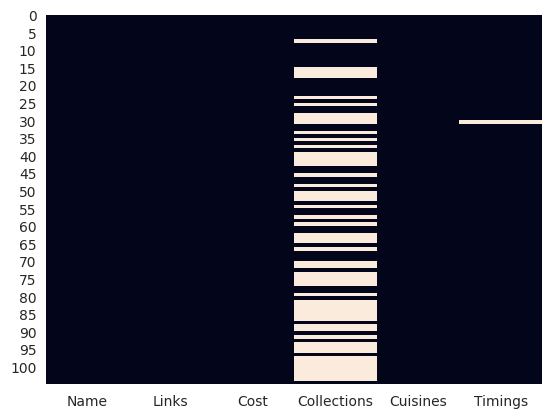

In [128]:
# Visualizing the missing values
sns.heatmap(restaurants_df.isnull(), cbar=False)

<Axes: >

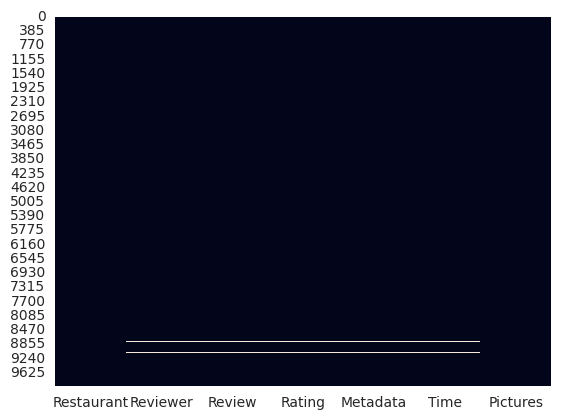

In [129]:
# Visualizing the missing values for reviews
sns.heatmap(reviews_df.isnull(), cbar = False)

### What did you know about your dataset?

**Restaurant DataSet**

- There are 105 total observation with 6 different features.
- Feature like collection and timing has null values.
- There is no duplicate values i.e., 105 unique data.
- Feature cost represent amount but has object data type because these values are separated by comma ','.
- Timing represent operational hour but as it is represented in the form of text has object data type.

**Review DataSet**

- There are total 10000 observation and 7 features.
- Except picture and restaurant feature all others have null values.
- There are total of 36 duplicate values for two restaurant - American Wild Wings and Arena Eleven, where all these duplicate values generally have null values.
- Rating represent ordinal data, has object data type should be integer.
- Timing represent the time when review was posted but show object data time, it should be converted into date time.

## ***2. Understanding Your Variables***

In [130]:
# Dataset Columns
print(restaurants_df.columns)
print(reviews_df.columns)

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')
Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')


In [131]:
# Dataset Describe
restaurants_df.describe().T

count unique                                                top  \
Name          105    105                                    Beyond Flavours   
Links         105    105  https://www.zomato.com/hyderabad/beyond-flavou...   
Cost          105     29                                                500   
Collections    51     42        Food Hygiene Rated Restaurants in Hyderabad   
Cuisines      105     92                              North Indian, Chinese   
Timings       104     77                                     11 AM to 11 PM   

            freq  
Name           1  
Links          1  
Cost          13  
Collections    4  
Cuisines       4  
Timings        6

In [132]:
reviews_df.describe(include = 'all').T

count unique              top  freq    mean       std  min  25%  \
Restaurant    10000    100  Beyond Flavours   100     NaN       NaN  NaN  NaN   
Reviewer       9962   7446      Parijat Ray    13     NaN       NaN  NaN  NaN   
Review         9955   9364             good   237     NaN       NaN  NaN  NaN   
Rating         9962     10                5  3832     NaN       NaN  NaN  NaN   
Metadata       9962   2477         1 Review   919     NaN       NaN  NaN  NaN   
Time           9962   9782  7/29/2018 20:34     3     NaN       NaN  NaN  NaN   
Pictures    10000.0    NaN              NaN   NaN  0.7486  2.570381  0.0  0.0   

            50%  75%   max  
Restaurant  NaN  NaN   NaN  
Reviewer    NaN  NaN   NaN  
Review      NaN  NaN   NaN  
Rating      NaN  NaN   NaN  
Metadata    NaN  NaN   NaN  
Time        NaN  NaN   NaN  
Pictures    0.0  0.0  64.0

### Variables Description

**Zomato Restaurant**

- Name : Name of Restaurants

- Links : URL Links of Restaurants

- Cost : Per person estimated Cost of dining

- Collection : Tagging of Restaurants w.r.t. Zomato categories

- Cuisines : Cuisines served by Restaurants

- Timings : Restaurant Timings

**Zomato Restaurant Reviews**

- Restaurant : Name of the Restaurant

- Reviewer : Name of the Reviewer

- Review : Review Text

- Rating : Rating Provided by Reviewer

- MetaData : Reviewer Metadata - No. of Reviews and followers

- Time: Date and Time of Review

- Pictures : No. of pictures posted with review

### Check Unique Values for each variable.

In [133]:
# Check Unique Values for each variable.
print(f"Restaraunts Uniques Values per column: \n{restaurants_df.nunique()}")
print(f"\nReviews Uniques Values per column: \n{reviews_df.nunique()}")

Restaraunts Uniques Values per column: 
Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

Reviews Uniques Values per column: 
Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [134]:
# Copies made for future reference
reviews = reviews_df.copy()
restaurants = restaurants_df.copy()

In [135]:
# Cleaning the cost column into suitable dtype
restaurants['Cost'] = restaurants['Cost'].str.replace(',','').astype(int)
restaurants.sort_values('Cost', ascending = False)[['Name','Cost']].head()

Name  Cost
92               Collage - Hyatt Hyderabad Gachibowli  2800
56                   Feast - Sheraton Hyderabad Hotel  2500
21  Jonathan's Kitchen - Holiday Inn Express & Suites  1900
18                                  10 Downing Street  1900
91            Cascade - Radisson Hyderabad Hitec City  1800

In [136]:
# Dividing the cuisines and collections into lists
restaurants['Cuisines'] = restaurants['Cuisines'].str.split(', ')
restaurants['Collections'] = restaurants['Collections'].str.split(', ')
restaurants.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links  Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...   800   
1  https://www.zomato.com/hyderabad/paradise-gach...   800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...   800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1200   

                                         Collections  \
0  [Food Hygiene Rated Restaurants in Hyderabad, ...   
1                              [Hyderabad's Hottest]   
2               [Great Buffets, Hyderabad's Hottest]   
3                           [Late Night Restaurants]   
4  [Best Bars & Pubs, Food Hygiene Rated Restaura...   

                                            Cuisines  \
0  [Chinese, Continental, Kebab, European, South ...   
1                   [Biryani, North Indian, Chinese]   
2     [Asian, Mediterranean, North Indian, Desserts]   
3  [Biryani, North Indian, Chinese, Seafood, Beve...   
4  [Asian, Continental, North Indian, Chinese, Me...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [137]:
# Extracting the location from the links
restaurants['Links'] = restaurants['Links'].str.split('/').str[3]
restaurants.rename(columns = {'Links': 'Location'}, inplace = True)
restaurants.head()

Name   Location  Cost  \
0                 Beyond Flavours  hyderabad   800   
1                        Paradise  hyderabad   800   
2                        Flechazo  hyderabad  1300   
3  Shah Ghouse Hotel & Restaurant  hyderabad   800   
4      Over The Moon Brew Company  hyderabad  1200   

                                         Collections  \
0  [Food Hygiene Rated Restaurants in Hyderabad, ...   
1                              [Hyderabad's Hottest]   
2               [Great Buffets, Hyderabad's Hottest]   
3                           [Late Night Restaurants]   
4  [Best Bars & Pubs, Food Hygiene Rated Restaura...   

                                            Cuisines  \
0  [Chinese, Continental, Kebab, European, South ...   
1                   [Biryani, North Indian, Chinese]   
2     [Asian, Mediterranean, North Indian, Desserts]   
3  [Biryani, North Indian, Chinese, Seafood, Beve...   
4  [Asian, Continental, North Indian, Chinese, Me...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [138]:
# Understanding collections

# Count Restaurants per collection
collections = restaurants['Collections'].dropna().explode().value_counts()
collections_df = pd.DataFrame(collections).reset_index().rename(columns={'count':'Number of Restaurants'})

# Finding average cost of each collection
for collection in collections_df['Collections']:
  collection_cost_list = []
  for index,row in restaurants.iterrows():
    if isinstance(row['Collections'], list):
      if collection in row['Collections']:
        collection_cost_list.append(row['Cost'])
  collections_df.loc[collections_df['Collections']==collection, 'Average_Cost'] = round(sum(collection_cost_list)/len(collection_cost_list),2)

collections_df.head()

Collections  Number of Restaurants  \
0                                Great Buffets                     11   
1  Food Hygiene Rated Restaurants in Hyderabad                      8   
2                       Live Sports Screenings                      7   
3                          Hyderabad's Hottest                      7   
4                          Corporate Favorites                      6   

   Average_Cost  
0       1086.36  
1        987.50  
2       1157.14  
3       1342.86  
4       1300.00

In [139]:
# Undersanding Cuisines

# Count Restaurants per cuisine
cuisines = restaurants['Cuisines'].explode().value_counts()
cuisines_df = pd.DataFrame(cuisines).reset_index().rename(columns={'count':'Number of Restaurants'})

# Finding average cost of each cuisine
for cuisine in cuisines_df['Cuisines']:
  cuisine_cost_list = []
  for index,row in restaurants.iterrows():
    if cuisine in row['Cuisines']:
      cuisine_cost_list.append(row['Cost'])
  cuisines_df.loc[cuisines_df['Cuisines']==cuisine, 'Average_Cost'] = round(sum(cuisine_cost_list)/len(cuisine_cost_list),2)

cuisines_df.head()

Cuisines  Number of Restaurants  Average_Cost
0  North Indian                     61        955.74
1       Chinese                     43        895.35
2   Continental                     21       1307.14
3       Biryani                     16        650.00
4     Fast Food                     15        493.33

In [140]:
# Dropping duplicate rows
reviews.drop_duplicates(inplace=True)

# Missing Value Removal
reviews.dropna(subset = ['Review'], inplace = True)
reviews.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

In [141]:
# Treating the dtype of Rating
reviews.loc[reviews['Rating'] == 'Like','Rating'] = 5
reviews['Rating'] = reviews["Rating"].astype(float)

In [142]:
# Dividing the metadata column into Review Count and Followers
reviews['Review_Count'] = reviews['Metadata'].str.split(',').str[0].str.extract('(\d+)').astype(int)
reviews['Followers'] = reviews['Metadata'].str.split(',').str[1].str.extract('(\d+)').fillna(0).astype(int)

# Converting Time to DateTime Format
reviews['Time'] = pd.to_datetime(reviews['Time'])

# Extracting year from Time
reviews["Review_Year"] = reviews["Time"].dt.year

# Dropping unnecessary columns
reviews.drop('Metadata', axis = 1, inplace = True)

reviews.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                 Time  Pictures  Review_Count  Followers  Review_Year  
0 2019-05-25 15:54:00         0             1          2         2019  
1 2019-05-25 14:20:00         0             3          2         2019  
2 2019-05-24 22:54:00         0             2          3         2019  
3 2019-05-24 22:11:00         0             1          1         2019  
4 2019-05-24 21:37:00         0             3          2         2019

In [143]:
# Making a reviewer df to understand more about Critics
reviewer_df = reviews.groupby('Reviewer').agg({'Followers':'max', 'Review_Count': 'max', 'Rating': 'mean'}).sort_values('Followers', ascending = False).reset_index()
reviewer_df['Rating'] = reviewer_df['Rating'].round(2)

reviewer_df.head()

Reviewer  Followers  Review_Count  Rating
0    Satwinder Singh      13410           186    3.67
1         Eat_vth_me      13320            60    5.00
2       Samar Sardar      11329             8    3.50
3  Foodies Hyderabad       9494            31    4.50
4           Srinivas       7628            34    3.71

In [144]:
# Verifying changes
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9955 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Restaurant    9955 non-null   object        
 1   Reviewer      9955 non-null   object        
 2   Review        9955 non-null   object        
 3   Rating        9955 non-null   float64       
 4   Time          9955 non-null   datetime64[ns]
 5   Pictures      9955 non-null   int64         
 6   Review_Count  9955 non-null   int64         
 7   Followers     9955 non-null   int64         
 8   Review_Year   9955 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(3), object(3)
memory usage: 996.9+ KB


In [145]:
# Understanding Restaurant Ratings
avg_restaurant_ratings = reviews.groupby('Restaurant').agg({'Rating': 'mean', 'Review_Count': 'count'}).sort_values('Rating', ascending = False).reset_index()

avg_restaurant_ratings.head()

Restaurant  Rating  Review_Count
0       AB's - Absolute Barbecues    4.88           100
1                          B-Dubs    4.81           100
2  3B's - Buddies, Bar & Barbecue    4.76           100
3                        Paradise    4.70           100
4                        Flechazo    4.66           100

In [146]:
# Made a copy of reviews cleaned
reviews_cleaned = reviews.copy()

restaurants.rename(columns = {'Name':'Restaurant'}, inplace = True)

# Merged the 2 dataframes for better visualizations
merged = reviews.merge(restaurants, on = 'Restaurant', how = 'left')

merged.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                 Time  Pictures  Review_Count  Followers  Review_Year  \
0 2019-05-25 15:54:00         0             1          2         2019   
1 2019-05-25 14:20:00         0             3          2         2019   
2 2019-05-24 22:54:00         0             2          3         2019   
3 2019-05-24 22:11:00         0             1          1         2019   
4 2019-05-24 21:37:00         0             3          2         2019   

    Location  Cost                                        Collections  \
0  hyderabad   800  [Food Hygiene Rated Restaurants in Hyderabad, ...   
1  hyderabad   800  [Food Hygiene Rated Restaurants in Hyderabad, ...   
2  hyderabad   800  [Food Hygiene Rated Restaurants in Hyderabad, ...   
3  hyderabad   800  [Food Hygiene Rated Restaurants in Hyderabad, ...   
4  hyderabad   800  [Food Hygiene Rated Restaurants in Hyderabad, ...   

                                            Cuisines  \
0  [Chinese, Continental, Kebab, European, South ...   
1  [Chinese, Continental, Kebab, European, South ...   
2  [Chinese, Continental, Kebab, European, South ...   
3  [Chinese, Continental, Kebab, European, South ...   
4  [Chinese, Continental, Kebab, European, South ...   

                                         Timings  
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
2  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
3  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
4  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)

### What all manipulations have you done and insights you found?

Firstly, I started with changing data types for cost and rating. In rating there was only one rating which was string or has value of like so I change it into median of the rating. This was done to make data consistent.

Restaurant data : In this dataset I first figured out 5 costlier restaurant in which Collage - Hyatt Hyderabad Gachibowli has maximum price of 2800 and then found the lowest which is Amul with price of 150. Then I found how many hotel share same price i.e., 13 hotel share 500 price. North indian cuisine with great buffet tags is mostly used in hotels.

Review data : In this dataset I found famous or restaurant that show maximum engagement. Followed by that I found most followed critic which was Satwinder Singh who posted total of 186 reviews and had followers of 13410 who gives and average of 3.67 rating for each order he makes. Lastly I also found in year 2018 4903 hotels got reviews.

Then I merged the two dataset together to figure out the price point for the restaurant, top rated restaurant AB's - Absolute Barbecues has a price point of 1500 and the low rated Hotel Zara Hi-Fi has price point of 400.

In order to exactly understand why even with price point of 1500 these hotel has maximum number of rating and sentiment of those rating need to extract words from the text and do futher analysis of the review and then followed by forming clusters so that one can get recommendation about top quality restaurants.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

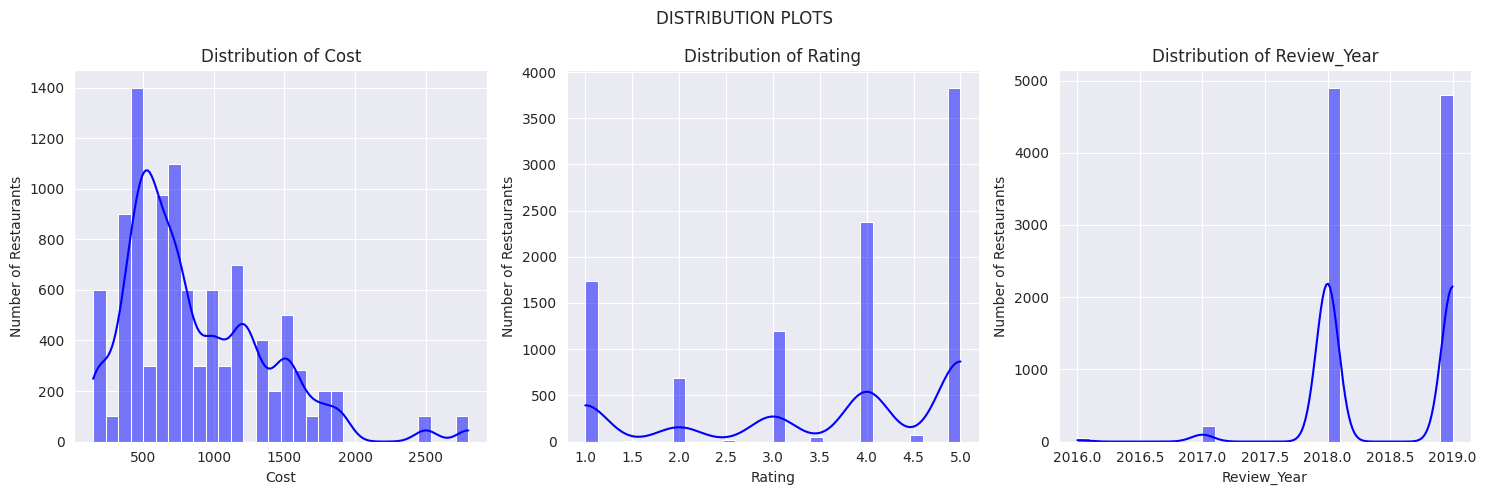

In [147]:
# Chart - 1 visualization code

# set style of all plots
sns.set_style("darkgrid")

# Selected columns
cols = ["Cost", "Rating", "Review_Year"]
fig, axes = plt.subplots(1,3, figsize = (15,5))

# Plotting 3 histplots to show distribution among cost, rating, Review_Year Each
for i, col in enumerate(cols):
  sns.histplot(merged[col], bins = 30, kde = True, color = "blue", ax = axes[i])
  axes[i].set_title(f"Distribution of {col}")
  axes[i].set_xlabel(f"{col}")
  axes[i].set_ylabel("Number of Restaurants")

# Added Title and displayed the plot
fig.suptitle("DISTRIBUTION PLOTS")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I picked histogram for this particular chart because histogram is best used to show distribution of various features. Here, with the help of histplot of seaborn we can see how cost, ratings and review year is distributed throughout the dataset.

##### 2. What is/are the insight(s) found from the chart?

1. From this cost distribution we can see that most of the restaurants are averagely priced, that is in the range of 200 - 1500 rupees, and the number of restaurants decrease as the price increases.
2. The second graph shows us that majority of the restaurants are highly ranked among 4 and 5 ratings. There are also a significant amount of restaurants that are low ranked (1).
3. The 3rd histogram shows us the year when we got the review. Almost all the reviews we have are in 2018 and 2019, and insignificantly less before that.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

The positive that we can take is that most of the restaurants are affordable which is a good thing for a country with majority people in the middle class segment. The ratings of most of the restaurants are positive indicating good experience with the customers. Majority reviews are latest, which shows that customer engagement has been highest recently and reviews are more accurate.

The negatives that we can take is that the options for a high end classy restaurant is very low, there still are a huge amount of ratings that are in the red. Having only recent reviews could also indicate that these restaurants are fairly new and we donot have a historical track record to compare.

#### Chart - 2

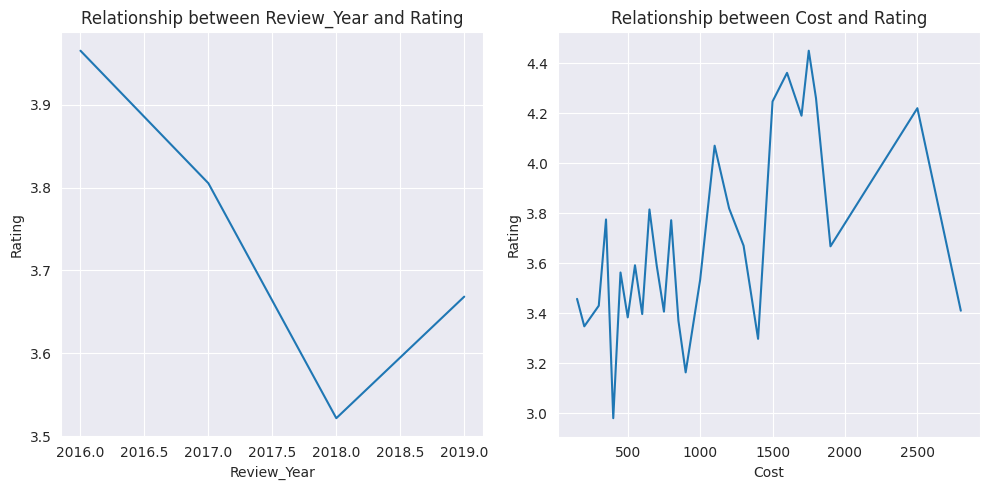

In [148]:
# Chart - 2 visualization code

# Selected Columns for Visualization
cols = ["Review_Year", "Cost"]
fig, axes = plt.subplots(1,2, figsize = (10,5))

# Plotting 2 lineplots to show relationship between ratins with review year and cost each
for i, col in enumerate(cols):
  df = merged.groupby(col)["Rating"].mean().reset_index()
  sns.lineplot(x = col, y = "Rating", data = df, ax = axes[i])
  axes[i].set_title(f"Relationship between {col} and Rating")
  axes[i].set_xlabel(f"{col}")
  axes[i].set_ylabel("Rating")

# Display the chart
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Line chart is best used when we wants to measure change. Here I have used line chart to view changes in rating with change in review year and cost. The first line chart shows us that average reviews were lowest in 2018 and highest in 2016. The second show that even though the cost keeps fluctuating, overall cost keeps increasing, the ratings also do.

##### 2. What is/are the insight(s) found from the chart?

From the first chart we see that the reviews have been lowest in 2018, despite the fact that highest number of reviews were seen in the same year. The cost varies a lot but overall the graph is moving upwards indicating a positive movement but this can also be due to low number of restaurants.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

The positives is that the higher price restaurants are doing justice to the price they are quoting. The problem here that is fairly visible is that the number of reviews highly affect the average rating. In the years there were low number of reviews or the price range in which there are low number of restaurants, the ratings increase and vice versa. This could have a negative impact on growth due to inaccurate results.

#### Chart - 3

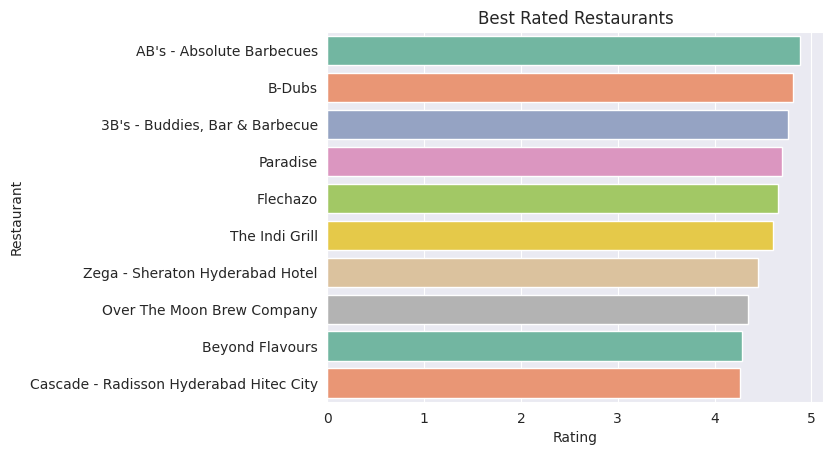

In [149]:
# Chart - 3 visualization code

# Barplot to show the top 10 restaurants sorted by their ratings
sns.barplot(x = "Rating", y = "Restaurant", hue = "Restaurant", legend = False, data = avg_restaurant_ratings.head(10), palette = 'Set2')
plt.title("Best Rated Restaurants")
plt.xlabel("Rating")
plt.ylabel("Restaurant")

# Display the plot
plt.show()

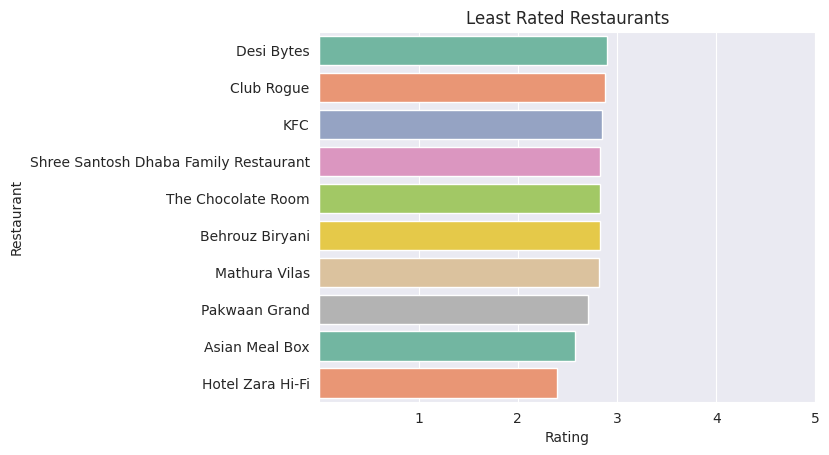

In [150]:
# Barplot to show the bottom 10 restaurants sorted by their ratings
sns.barplot(x = "Rating", y = "Restaurant", hue = "Restaurant", legend = False, data = avg_restaurant_ratings.tail(10), palette = 'Set2')
plt.title("Least Rated Restaurants")
plt.xlabel("Rating")
plt.xticks([1,2,3,4,5])
plt.ylabel("Restaurant")

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

Bar Chart is used when you want to display how a numerical feature of a categorical feature is distributed. Here, we are trying to show how ratings of different restaurants are distributed.

##### 2. What is/are the insight(s) found from the chart?

From the top chart we see that AB's is the most liked restaurant when it comes to ratings with an average rating close to a perfect 5. This tells us that most of the reviews given to ABs were positive. Considering, average ratings of top 10 restaurants is above 4, it says that a lot of restaurants in the dataset are pretty good. The second chart tells us that, when it comes to the least rated restaurants, Hotel Zara HiFi is not very popular among those who visited, with an average rating closing to a mere 2.5.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

These charts gives us information about how well the restaurants visited by customers are recieved. This could be vital for any business wether positive or negative. The top rated restaurants could become the face of Zomato when customers are trying to make bookings. At the same time, the bottom ranked restaurants could be less preferred by user, causing the restaurants to take their services off zomato.

#### Chart - 4

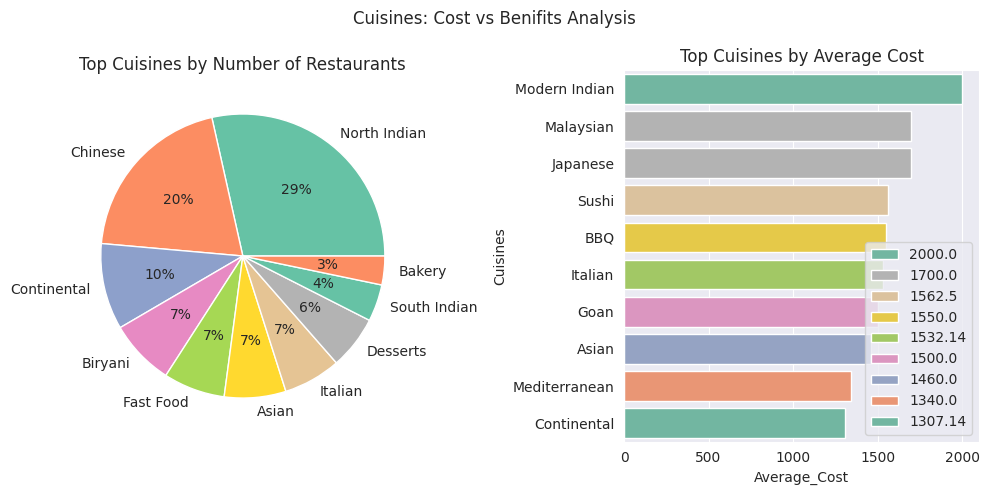

In [151]:
# Chart - 4 visualization code

# Understaning Cuisines

# Created a figure to show subplots
fig = plt.figure(figsize = (10,5))

# Subplot 1: Pie plot to show the Cuisines servered by Most Restaurants
plt.subplot(1,2,1)
data = cuisines_df.head(10)
plt.pie(data['Number of Restaurants'], labels = data['Cuisines'], autopct= '%0.0f%%', colors = sns.color_palette('Set2'))
plt.title("Top Cuisines by Number of Restaurants")

# Subplot 2: Barplot to show the most expensive cuisines
plt.subplot(1,2,2)
data = cuisines_df.sort_values('Average_Cost', ascending = False).head(10)
sns.barplot(x = 'Average_Cost', y = 'Cuisines', data = data, hue = 'Average_Cost', palette = 'Set2')
plt.legend(reverse = True)
plt.title("Top Cuisines by Average Cost")

# Adding a title and displaying the plot
plt.suptitle("Cuisines: Cost vs Benifits Analysis")
plt.tight_layout()
plt.show()

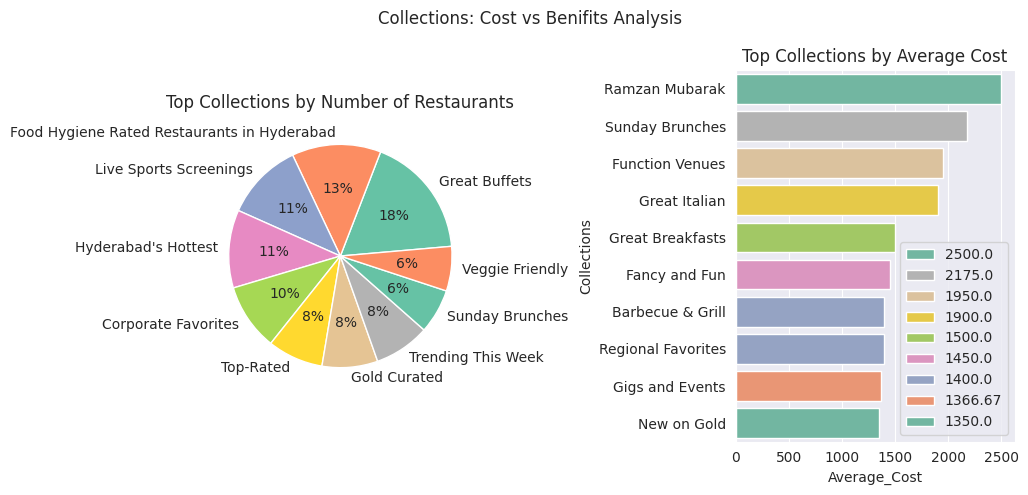

In [152]:
# Understanding Collections

# Created a figure to show subplots
fig = plt.figure(figsize = (10,5))

# Subplot 1: Pie plot to show the Collections servered by Most Restaurants
plt.subplot(1,2,1)
data = collections_df.head(10)
plt.pie(data['Number of Restaurants'], labels = data['Collections'], autopct= '%0.0f%%', startangle = 5, colors = sns.color_palette('Set2'))
plt.title("Top Collections by Number of Restaurants")

# Subplot 2: Barplot to show the most expensive collections
plt.subplot(1,2,2)
data = collections_df.sort_values('Average_Cost', ascending = False).head(10)
sns.barplot(x = 'Average_Cost', y = 'Collections', data = data, hue = 'Average_Cost', palette = 'Set2')
plt.legend(reverse = True)
plt.title("Top Collections by Average Cost")

# Adding a title and displaying the plot
plt.suptitle("Collections: Cost vs Benifits Analysis")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Pie Chart is best used when you want to show how a dataset is distributed when seen as a percentage of the total. These pie charts show how the dataset's top cusines and collections are distributed. Bar Charts can show how each item in the data is in comparsion to other items. Here we are displaying bar charts to show the most expensive cuisines and collections

##### 2. What is/are the insight(s) found from the chart?

The first pie chart tells you the cuisines that are most there in the given data. 29% of the dataset is North Indian restaurants, with chinese being a close second with 20%, everything else is 10% or less.

The first bar chart shows that Modern Indian Cuisine is the most expensive cuisine with an avg cost of Rs.2000. We can also see that most of the top cuisines cross a threshold of Rs.1000 showing how expensive they all are.

When it comes to the second pie chart, the variance in the data is slightly less. 18% the restaurants are buffets, 13% are food hygiene rated restaurants and so on. This shows that when it comes to collection most of them are very closely distributed.

The second bar chart shows that all collections falling under Ramzan Mubarak are the most expensive ones with Rs.2500, with Sunday Brunch Restaurants following a close suit with Rs.2175. These shows how expensive these collections truly are.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

The number of restaurants in Hyderabad are mostly North Indian, despite the city being in South of India. To attract more outsiders to order from Zomato, it could focus more on regional cuisines. A city like Hyderabad having only 7% restaurants for Biryani, could be a deal breaker for many foodies. Although when it comes to collections, the variance in data is very less, which is acceptable for most food orderers.

The costs of these restaurants are way above a standard eating cost of about Rs.1000, showing how expensive the top cuisines and collections are. This could bring popularity among the fine diners but may not seem of much interest to people who arent willing to pay as much.

#### Chart - 5

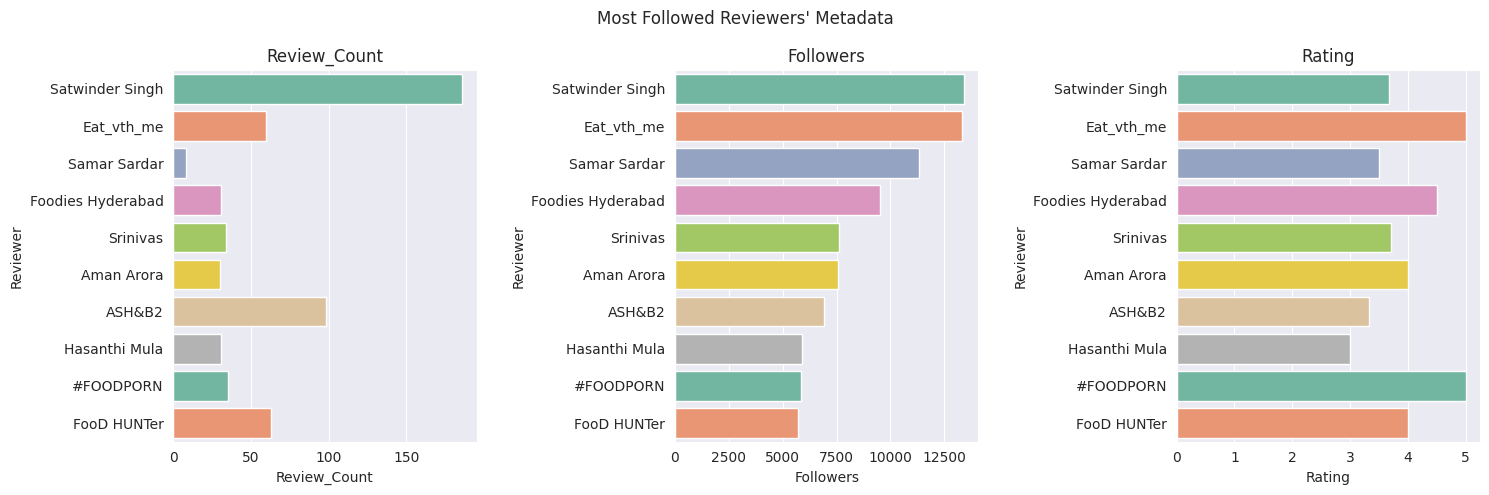

In [153]:
# Chart - 5 visualization code

# Selecting columns for Visualization
figure = plt.figure(figsize = (15,5))
cols = ["Review_Count", "Followers", "Rating"]

# Plotting 3 subplots to show the metadata of the most followed reviewers
for i, col in enumerate(cols):
  plt.subplot(1,3,i+1)
  sns.barplot(x = col, y = "Reviewer", hue = "Reviewer", data = reviewer_df.head(10), palette = 'Set2')
  plt.title(f"{col}")

# Added title and displayed the charts
plt.suptitle("Most Followed Reviewers' Metadata")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Here, I am trying to compare different reviewer metadata to understand how well their words weigh. Reviewers with highers followers and review counts tell us they are serious about their reviews and their claims hold weightage to a lot of people. This is why we took multiple bar graphs and displayed them together to understand how each reviewer is.

##### 2. What is/are the insight(s) found from the chart?

From the above charts, we understand that Satwinder Singh is a reviewer who is well recieved and frequent. He has the highest number of follower, a little over 12500 and the most number of reviews, close to 200. But he gives out ratings very harshly as his average is just over 3.5. At the same time Eat_vth_me is quite popular among followers although he hasnt given a lot of reviews, but he only gives positive about every restaurant and has an average rating of 5.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

This insight gives us information about reviewers who are most followed by other foodies. This information gives an idea to restaurants about what kind of reviews customers prefer and deem important and help the know what they can work on. New restaurants can invite these reviewers to have them experience the hotel and give a review so other people approach the place.

#### Chart - 6

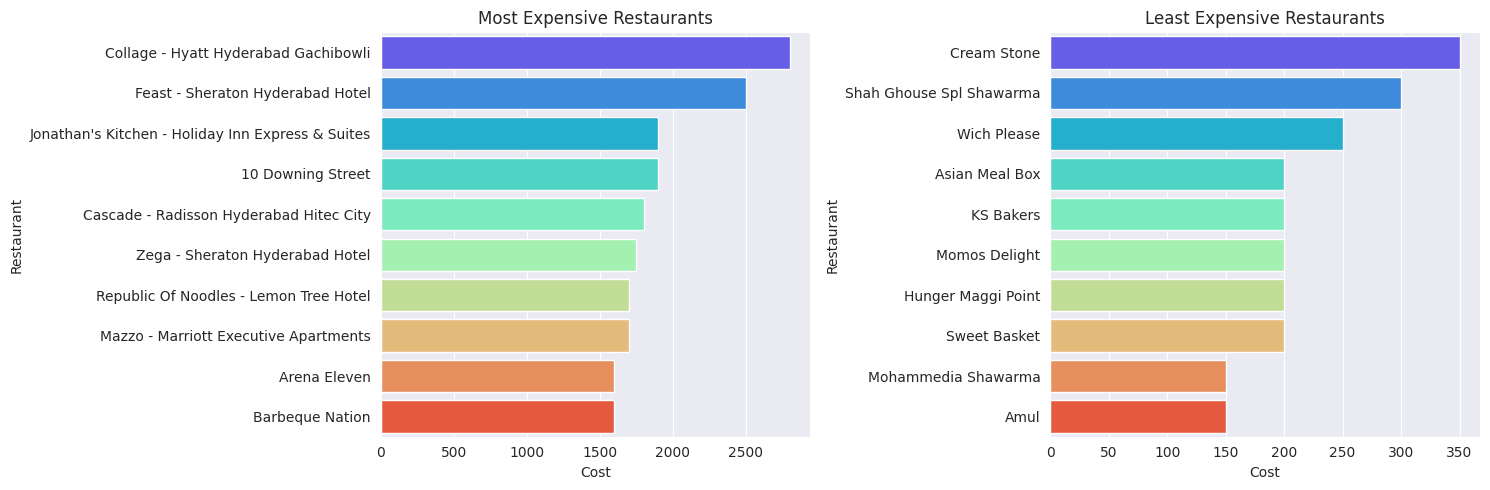

In [154]:
# Chart - 6 visualization code

# Prepared df for visualization
cost_df = restaurants.sort_values("Cost", ascending = False)[["Restaurant", "Cost"]].reset_index(drop = True)

figure = plt.figure(figsize = (15,5))

# Subplot 1: Bar chart showing the most expensive restaurants
plt.subplot(1,2,1)
sns.barplot(x = "Cost", y = "Restaurant", hue = "Restaurant", data = cost_df.head(10), palette = 'rainbow')
plt.title("Most Expensive Restaurants")

# Subplot 2: Bar chart showing the least expensive restaurants
plt.subplot(1,2,2)
sns.barplot(x = "Cost", y = "Restaurant", hue = "Restaurant", data = cost_df.tail(10), palette = 'rainbow')
plt.title("Least Expensive Restaurants")

# Displaying the charts
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Here, we have taken 2 bar charts to see which restaurants are most expensive and which one is the least! We have taken a bar chart to understand how each they fare compared to each other. With this, you can visualize their cost and also get a comparative analysis.

##### 2. What is/are the insight(s) found from the chart?

We can see that Collage-Hyatt is the most expensive hotel in Hyd with its budget being close to 3000 for a meal and at the same time Shah Ghouse is one of the most affordable restaurants (Cream Stone being just a dessert place) with a budget of around 300 bucks. The difference is see is almost 10 times, this gives us an understanding of what range all the restaurants are placed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

These charts can be very beneficial in many ways. For example, if we want to suggest a user a restaurant on the basis of their past preferences such as the average cost of his orders, this information would come handy.

#### Chart - 7

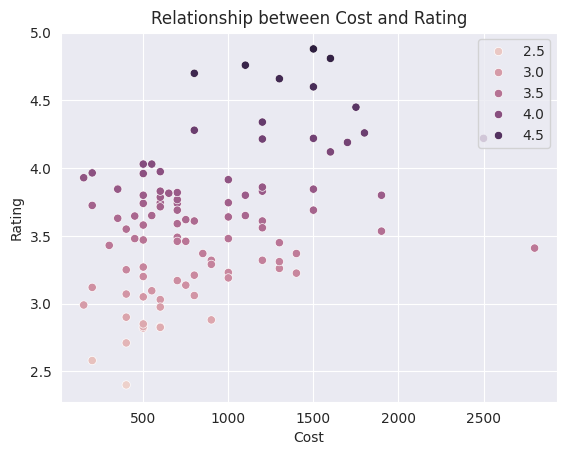

In [155]:
# Chart - 7 visualization code

# Prepared df for visualization
cost_rating_df = cost_df.merge(avg_restaurant_ratings, on = "Restaurant", how = "left")

# Scatterplot to plot all cost and ratings
sns.scatterplot(x = "Cost", y = "Rating", hue = "Rating", data = cost_rating_df)
plt.title("Relationship between Cost and Rating")
plt.xlabel("Cost")
plt.ylabel("Rating")
plt.legend(loc = "upper right")

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots are best used to describe relationship between 2 numerical variables. Here we are trying to compare how restaurants' cost is compared to its rating to understand how does the rating vary as the price increases.

##### 2. What is/are the insight(s) found from the chart?

We see that the average ratings does go up as the cost increases, but this happens only till the cost hits the 1500 mark, then the average ratings start decreasing. Although this decrease could also be due to a couple outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

The positive insights that we can get out of this is that the higher costing restaurants are actually worth the money and this could have a clearer understanding on the users. The restaurants that are less expensive can give out advertising as affordable food and the more expensive ones can do it as an food experience.

#### Chart - 8

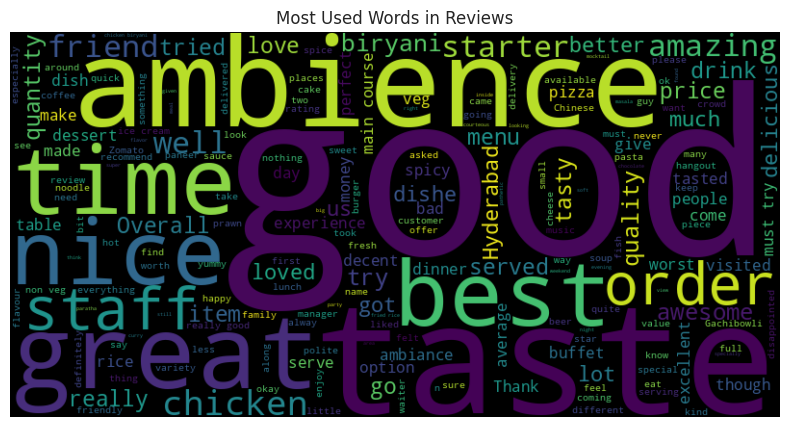

In [156]:
# Chart - 8 visualization code

# Prepared data for wordcloud visualization
reviews = " ".join(review for review in merged.Review)

# Prepared stopwords to be avoided in the data
stop_words = set(STOPWORDS).union(stopwords.words('english'))
stop_words.update(['food','place','ordered','service','restaurant','one','visit','went','even','u'])

# Prepared the WordCloud to show the most used words in reviews
wordcloud = WordCloud(stopwords = stop_words, background_color = 'black', width = 800, height = 400).generate(reviews)

# Plot the WordCloud
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

# Added title and displayed the chart
plt.title("Most Used Words in Reviews")
plt.show()

##### 1. Why did you pick the specific chart?

Wordclouds are the best charts when you want to show how text data are distributed. Here we want to understand how the reviews are throughout the dataset. In order to do that, we merged all the reviews and made a wordcloud of all the words that are repeated most often, barring a couple of stopwords that dont hold any significance for our analysis.

##### 2. What is/are the insight(s) found from the chart?

When we see the wordcloud, we can understand all the things, customers like to talk about most. We see that the word 'good' has been used the most times which could mean that a lot of reviewers have a positive thing to say about the restaurants. Similary we see that a lot of the people have spoken about ambience, taste, staff, time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

The above wordcloud gives a simple overview about what the reviewers like to talk about. This can give the restaurant owners insights about what is it that they can focus on and what is the current trend.

#### Chart - 9

##### 1. Why did you pick the specific chart?

Answer here

##### 2. What is/are the insight(s) found from the chart?

Answer here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [157]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [158]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [159]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [160]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

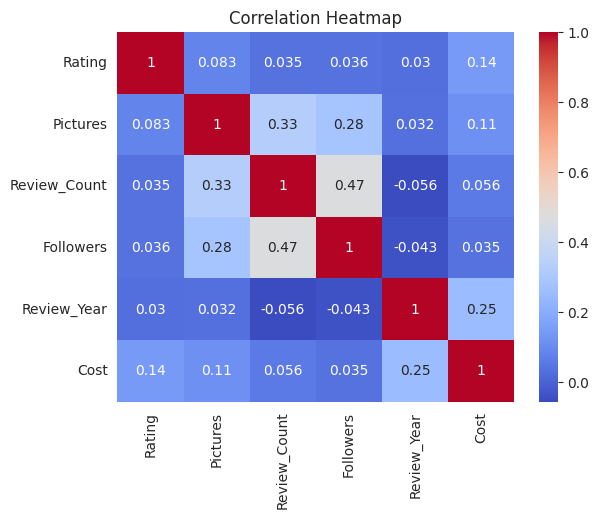

In [161]:
# Correlation Heatmap visualization code

# Selected columns
num_cols = merged.select_dtypes(include = ['int64', 'float64','int32']).columns

# Prepared correlation matrix
corr = merged[num_cols].corr()

# Prepared heatmap
sns.heatmap(corr, annot = True, cmap = "coolwarm")

# Added title and displayed the chart
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

This correlation heatmap tells us how all numerical features are corelated to each other. We can tell how each of this features change when there is a change in another.

##### 2. What is/are the insight(s) found from the chart?

The one feature that we are on a lookout for here is rating and how other features are correlated to it. Although none of the features are individually heavily influencing the ratings feature, we can observe that there is a positive correlationship.

#### Chart - 15 - Pair Plot

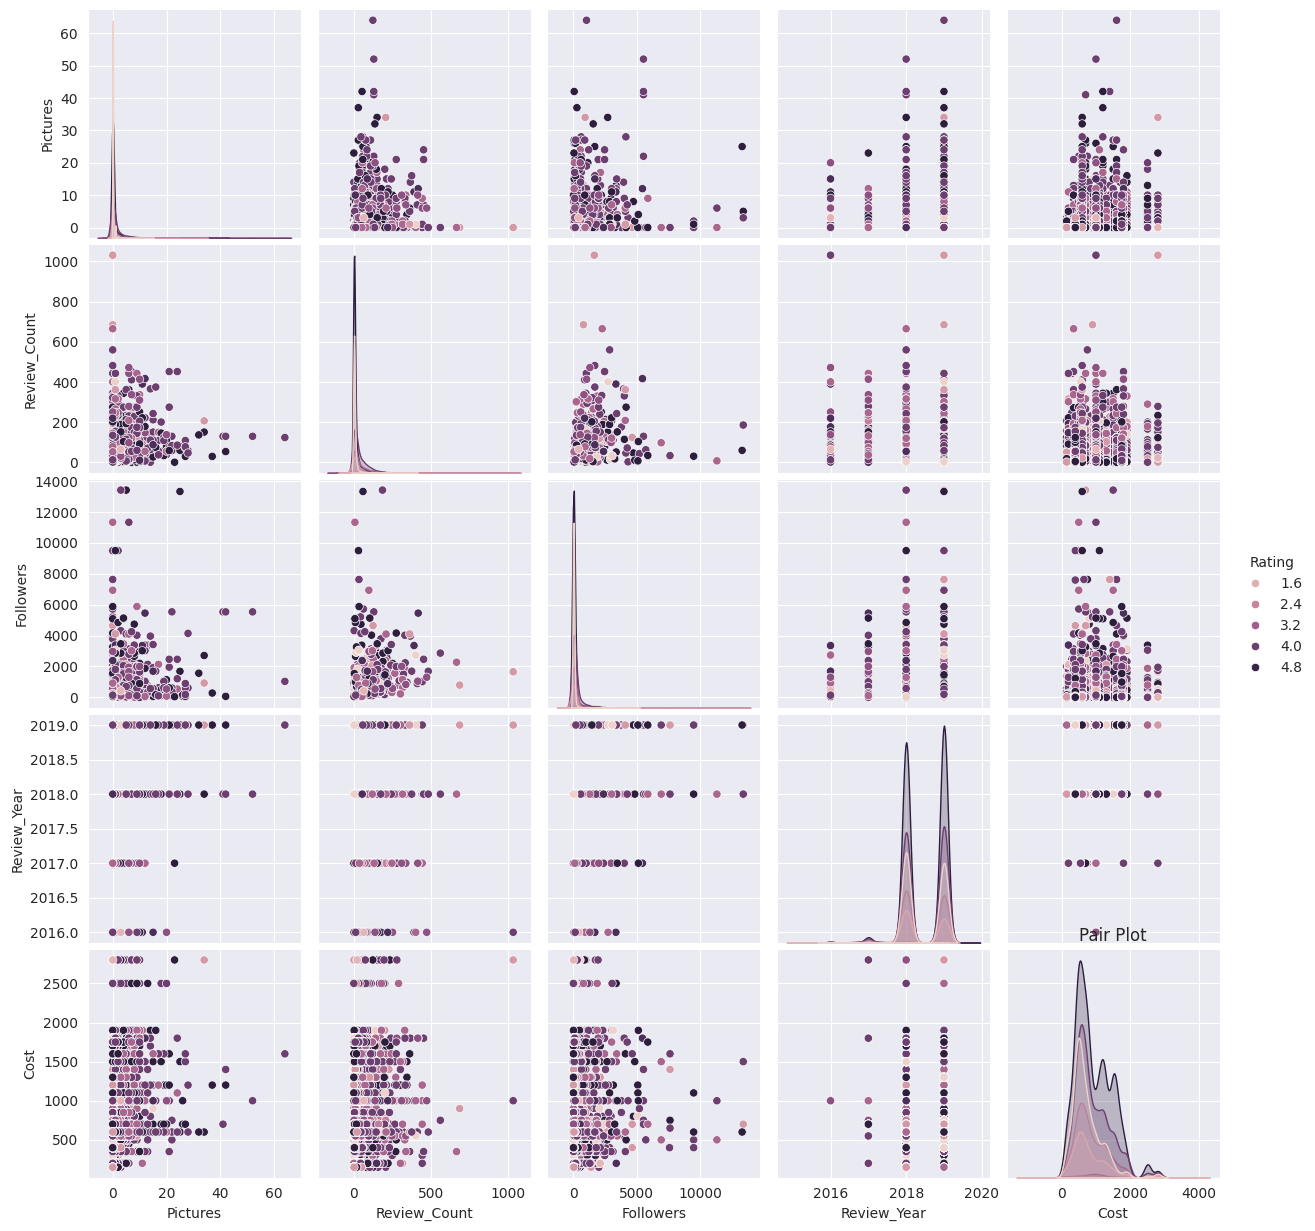

In [162]:
# Pair Plot visualization code

# Prepared pairplot to show relationship between all vairables
sns.pairplot(merged, hue = "Rating")

# Added title and displayed the plot
plt.title("Pair Plot")
plt.show()

##### 1. Why did you pick the specific chart?

Pairplot gives us a distribution matrix of how all the numerical features are distributed alone and when compared to other features. We have taken a hue of the ratings feature as that gives us an idea of how each of these features are affecting the ratings as well.

##### 2. What is/are the insight(s) found from the chart?

The insight that we get from this particular chart is that ratings is clearly not affected significantly by any of these features as there is no particular shape in hue distribution. We can also observe that none of the features have any particular shape in the scatter plot telling us that all these features are, to a large extend, not affected by other features.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. With an increase in cost, the rating of the restaurant also increases.
2. More pictures means better ratings.
3. Restaurants that offer more variety of cuisines get better ratings



### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: Cost increase has no change in ratings.(H0: 𝛽1 = 0)

Alternate Hypothesis: Cost increase affects the ratings positively. (H1: 𝛽1 > 0)

#### 2. Perform an appropriate statistical test.

In [163]:
# Perform Statistical Test to obtain P-Value

# Fitting an Ordinary Least Squared Model
# Formula: Rating is the dependent variable and Cost is independent
model = smf.ols(formula = 'Rating ~ Cost', data = merged).fit()

# Obtaining P-Value
p_val = model.pvalues[1]

# Conclusion: Reject if P-Value < 0.05
if p_val < 0.05:
  print("Reject Null Hypothesis")

  # Conclusion: Nature of relationship between ratings and cost
  if model.params[1] > 0:
    print("Cost increase affects the ratings positively")
  else:
    print("Cost increase affects the ratings negatively")

else:
  print("Fail to Reject Null Hypothesis")
  print("Cost increase has no change in ratings.")

Reject Null Hypothesis
Cost increase affects the ratings positively


##### Which statistical test have you done to obtain P-Value?

The statistical test I have used is the Linear Regression or the Ordinary Least Squared Regression(OLS) to get the p-value.

##### Why did you choose the specific statistical test?

Linear Regression test is used when you want to find out if there is a linear relationship between two variables. Here, we want to understand if a change in cost results in a change in ratings, which can be a linear relationship. We can use the sign of the coefficient to understand if the relationship is positive or negative as well!

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: Pictures does not affect ratings at all

Alternate Hypothesis: More pictures means better ratings.

#### 2. Perform an appropriate statistical test.

In [164]:
# Perform Statistical Test to obtain P-Value

# Fitting an Ordinary Least Squared Model
# Formula: Rating is the dependent variable and Pictures is independent
model = smf.ols(formula = 'Rating ~ Pictures', data = merged).fit()

# Obtaining P-Value
p_val = model.pvalues[1]

# Conclusion: Reject if P-Value < 0.05
if p_val < 0.05:
  print("Reject Null Hypothesis")

  # Conclusion: Nature of relationship between ratings and pictures
  if model.params[1] > 0:
    print("More pictures means better ratings.")
  else:
    print("Less pictures means better ratings.")

else:
  print("Fail to Reject Null Hypothesis")
  print("No relationship between pictures and Ratings.")

Reject Null Hypothesis
More pictures means better ratings.


##### Which statistical test have you done to obtain P-Value?

I have used the Simple Linear Regression test once again to obtain the p-value.

##### Why did you choose the specific statistical test?

The same reason for using the linear regression model as above is that we can identify and establish a linear relationship between 2 numerical features very easily with this statistical test.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: No relationship between number of various cuisines offered by a restaurant and ratings

Alternate Hypothesis: Restaurants that offer more variety of cuisines get better ratings

#### 2. Perform an appropriate statistical test.

In [165]:
# Perform Statistical Test to obtain P-Value

# Preparing data for the test
merged['num_cuisines'] = merged['Cuisines'].apply(lambda x: len(x))

# Calculating the pearson correlation coefficient and P-Value
corr, p_value = pearsonr(merged['num_cuisines'], merged['Rating'])

# Conclusion: Reject if P-Value < 0.05
if p_value < 0.05:
  print("Reject Null Hypothesis")

  # Conclusion: Nature of relationship between number of cuisines and ratings
  if corr > 0:
    print("There is a positive relationship between number of cuisines and ratings")
  else:
    print("There is a negative relationship between number of cuisines and ratings")

else:
  print("Fail to Reject Null Hypothesis")
  print("No relationship between number of cuisines and ratings")

Reject Null Hypothesis
There is a positive relationship between number of cuisines and ratings


##### Which statistical test have you done to obtain P-Value?

I have used the pearson correlation test here to obtain p_value.

##### Why did you choose the specific statistical test?

The reason I used this test is because both the values are continous and have a linear relationship. This test gives us a clear picture of the relationship between the two variables and with the help of the correlation coefficient we can identify the nature of the relationship as well.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [166]:
# Restaurants dataset after wrangling
restaurants_cleaned = restaurants.merge(avg_restaurant_ratings, on = "Restaurant", how = "left")

In [167]:
# Understanding Missing Values in restaurants dataset
round(restaurants_cleaned.isnull().sum()/restaurants_cleaned.shape[0] * 100,2)

Restaurant       0.00
Location         0.00
Cost             0.00
Collections     51.43
Cuisines         0.00
Timings          0.95
Rating           4.76
Review_Count     4.76
dtype: float64

In [168]:
# Understanding Missing Values in reviews dataset
round(reviews_cleaned.isnull().sum()/reviews_cleaned.shape[0] * 100,2)

Restaurant      0.0
Reviewer        0.0
Review          0.0
Rating          0.0
Time            0.0
Pictures        0.0
Review_Count    0.0
Followers       0.0
Review_Year     0.0
dtype: float64

In [169]:
# Imputing Missing values in Timings with mode
restaurants_cleaned['Timings'].fillna(restaurants_cleaned['Timings'].mode()[0], inplace = True)

# Imputing Missing values in Rating with 0
restaurants_cleaned['Rating'].fillna(0, inplace = True)

# Dropping unnecessary columns
restaurants_cleaned.drop(columns = ['Collections','Review_Count'], axis = 1, inplace = True)

# Verifying Changes
restaurants_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  105 non-null    object 
 1   Location    105 non-null    object 
 2   Cost        105 non-null    int64  
 3   Cuisines    105 non-null    object 
 4   Timings     105 non-null    object 
 5   Rating      105 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 5.0+ KB


#### What all missing value imputation techniques have you used and why did you use those techniques?

1. First, I found out missing values percentage in the columns of both datasets
2. Since timings had only 1% missing columns, we imputed the most common timings.
3. More than half of collections column has missing data, imputing that with anything would throw off the data as that would be change the data entirely. So we dropped the columns.

Note: Most of the missing values were treated during the data wrangling process.

### 2. Handling Outliers

In [170]:
# Handling Outliers & Outlier treatments
restaurants_preprocessed = restaurants_cleaned.copy()
reviews_preprocessed = reviews_cleaned.copy()

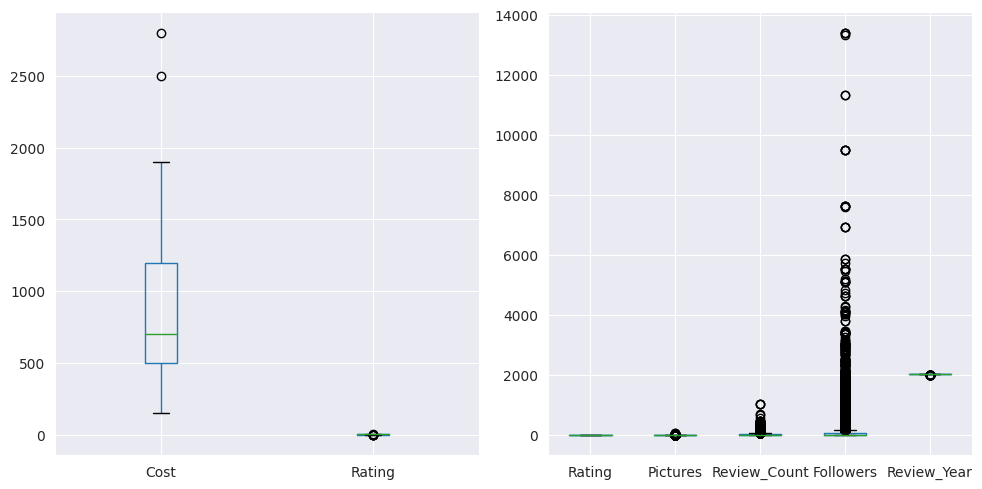

In [171]:
# Understanding Outliers
plt.figure(figsize = (10,5))

# Boxplot 1: Restaurants Outliers
plt.subplot(1,2,1)
restaurants_preprocessed.boxplot(figsize = (10,5))

# Boxplot 2: Reviews Outliers
plt.subplot(1,2,2)
reviews_preprocessed.boxplot(figsize = (10,5))

# Diplay plots
plt.tight_layout()
plt.show()

In [172]:
# Cost Outliers Removal through IQR Method
Q1 = restaurants_preprocessed['Cost'].quantile(0.25)
Q3 = restaurants_preprocessed['Cost'].quantile(0.75)
IQR = Q3 - Q1

restaurants_preprocessed = restaurants_preprocessed[~((restaurants_preprocessed['Cost'] < (Q1 - 1.5 * IQR)) | (restaurants_preprocessed['Cost'] > (Q3 + 1.5 * IQR)))]

In [173]:
# Followers, Review_Count, Pictures Outlier Treatment by applying log function
reviews_preprocessed['Followers'] = np.log(reviews_preprocessed['Followers']+1)
reviews_preprocessed['Review_Count'] = np.log(reviews_preprocessed['Review_Count']+1)
reviews_preprocessed['Pictures'] = np.log(reviews_preprocessed['Pictures']+1)

# Drop unnecessary column
reviews_preprocessed.drop('Review_Year', axis = 1, inplace = True)

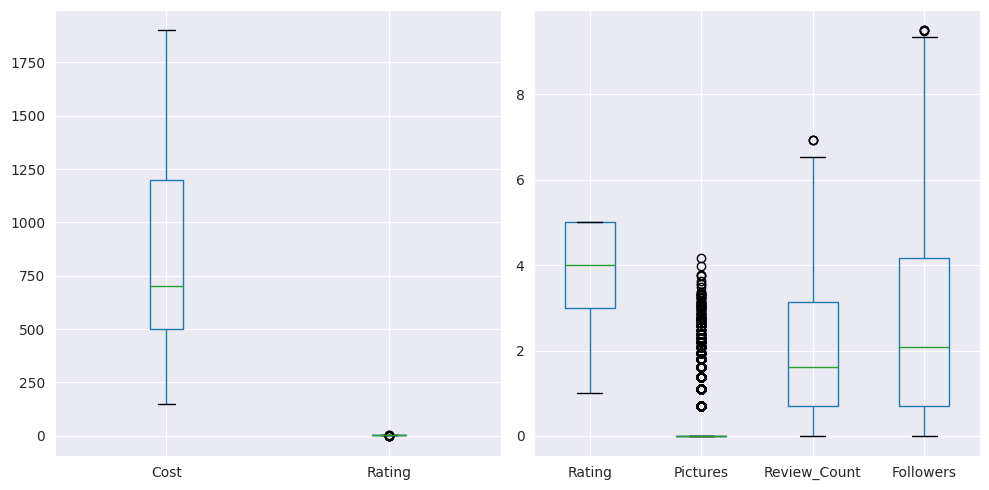

In [174]:
# Verifying changes
plt.figure(figsize = (10,5))

# Boxplot 1: Restaurants Outliers
plt.subplot(1,2,1)
restaurants_preprocessed.boxplot(figsize = (10,5))

# Boxplot 2: Reviews Outliers
plt.subplot(1,2,2)
reviews_preprocessed.boxplot(figsize = (10,5))

# Diplay plots
plt.tight_layout()
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

1. I used IQR Method to remove outliers in the cost column as this would effectively remove all the data that is outside the majority of the dataframe, i.e., between 25% and 50% quantile
2. I used to log transformation on the Followers, Review_Count, Pictures of the model. This would not only reduce the effect of outliers, but will also help make more effective clusters.

### 3. Categorical Encoding

In [175]:
# Encode your categorical columns
restaurants_preprocessed.head()

Restaurant   Location  Cost  \
0                 Beyond Flavours  hyderabad   800   
1                        Paradise  hyderabad   800   
2                        Flechazo  hyderabad  1300   
3  Shah Ghouse Hotel & Restaurant  hyderabad   800   
4      Over The Moon Brew Company  hyderabad  1200   

                                            Cuisines  \
0  [Chinese, Continental, Kebab, European, South ...   
1                   [Biryani, North Indian, Chinese]   
2     [Asian, Mediterranean, North Indian, Desserts]   
3  [Biryani, North Indian, Chinese, Seafood, Beve...   
4  [Asian, Continental, North Indian, Chinese, Me...   

                                             Timings  Rating  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)    4.28  
1                                     11 AM to 11 PM    4.70  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM    4.66  
3                                    12 Noon to 2 AM    3.21  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...    4.34

In [176]:
# Preparing restaurants df for encoding cuisines
cuisines = list(cuisines_df['Cuisines'])
df = restaurants_preprocessed[['Restaurant', 'Location', 'Cost', 'Cuisines', 'Rating']]
restaurants_encoded = pd.concat([df, pd.DataFrame(columns = cuisines)])

In [177]:
# One Hot Encoding for Cuisines
for i, row in restaurants_encoded.iterrows():
  for cuisine in cuisines:
    if cuisine in row['Cuisines']:
      restaurants_encoded.loc[i,cuisine] = 1
    else:
      restaurants_encoded.loc[i,cuisine] = 0

In [178]:
restaurants_encoded.head(1).T

0
Restaurant                                       Beyond Flavours
Location                                               hyderabad
Cost                                                       800.0
Cuisines       [Chinese, Continental, Kebab, European, South ...
Rating                                                      4.28
North Indian                                                   1
Chinese                                                        1
Continental                                                    1
Biryani                                                        0
Fast Food                                                      0
Asian                                                          0
Italian                                                        0
Desserts                                                       0
South Indian                                                   1
Bakery                                                         0
Kebab                                                          1
Cafe                                                           0
Andhra                                                         0
Mughlai                                                        0
American                                                       0
Salad                                                          0
Burger                                                         0
Mediterranean                                                  0
Beverages                                                      0
Momos                                                          0
Seafood                                                        0
European                                                       1
Hyderabadi                                                     0
Sushi                                                          0
Thai                                                           0
Modern Indian                                                  0
Arabian                                                        0
Ice Cream                                                      0
Street Food                                                    0
Japanese                                                       0
Finger Food                                                    0
BBQ                                                            0
Pizza                                                          0
North Eastern                                                  0
Mithai                                                         0
Indonesian                                                     0
Juices                                                         0
Wraps                                                          0
Spanish                                                        0
Mexican                                                        0
Goan                                                           0
Healthy Food                                                   0
Lebanese                                                       0
Malaysian                                                      0

#### What all categorical encoding techniques have you used & why did you use those techniques?

We have used one hot encoding for encoding the column 'Cuisines'. With this method we made sure that all the cuisines that are there in that restaurant be encoded as 1 and all not present as 0. This helps us identify all the cuisines that are present easily. Also, one hot encoding is highly compatible with most ML models, making it perfect for our use case.

Additionally, I have used label encoding to assign unique numbers for each of the restaurants, making it easier for the ML model to read.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [179]:
# Preparing df for Sentiment Analysis
sentiment_df = reviews_cleaned[['Restaurant', 'Reviewer','Review','Rating']].copy()

#### 1. Expand Contraction

In [180]:
# Expand Contraction
sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x: contractions.fix(x))

#### 2. Lower Casing

In [181]:
# Lower Casing
sentiment_df['Review'] = sentiment_df['Review'].str.lower()
sentiment_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  
0  the ambience was good, food was quite good . h...     5.0  
1  ambience is too good for a pleasant evening. s...     5.0  
2  a must try.. great food great ambience. thnx f...     5.0  
3  soumen das and arun was a great guy. only beca...     5.0  
4  food is good.we ordered kodi drumsticks and ba...     5.0

#### 3. Removing Punctuations

In [182]:
# Remove Punctuations

def rem_punc(text):
  translator = str.maketrans('','', string.punctuation)
  return text.translate(translator)

sentiment_df['Review'] = sentiment_df['Review'].apply(rem_punc)

sentiment_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  
0  the ambience was good food was quite good  had...     5.0  
1  ambience is too good for a pleasant evening se...     5.0  
2  a must try great food great ambience thnx for ...     5.0  
3  soumen das and arun was a great guy only becau...     5.0  
4  food is goodwe ordered kodi drumsticks and bas...     5.0

#### 4. Removing URLs & Removing words and digits contain digits.

In [183]:
# Remove URLs & Remove words and digits contain digits

def rem_url_dig(text):
  text = re.sub(r'http\S+',"", text)
  text = re.sub(r'\d+',"", text)
  return text

sentiment_df['Review'] = sentiment_df["Review"].apply(rem_url_dig)
sentiment_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  
0  the ambience was good food was quite good  had...     5.0  
1  ambience is too good for a pleasant evening se...     5.0  
2  a must try great food great ambience thnx for ...     5.0  
3  soumen das and arun was a great guy only becau...     5.0  
4  food is goodwe ordered kodi drumsticks and bas...     5.0

#### 5. Removing Stopwords & Removing White spaces

In [184]:
# Remove Stopwords
sw = stopwords.words('english')

# function to remove stopwords
def rem_stopwords(text):
  text = [word for word in text.split() if word.strip() not in sw]
  return " ".join(text)

sentiment_df['Review'] = sentiment_df['Review'].apply(rem_stopwords)

In [185]:
# Remove White spaces
sentiment_df['Review'] = sentiment_df["Review"].apply(lambda x: x.strip())
sentiment_df.head(2)

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   

                                              Review  Rating  
0  ambience good food quite good saturday lunch c...     5.0  
1  ambience good pleasant evening service prompt ...     5.0

#### 6. Rephrase Text

In [186]:
# Rephrase Text

#### 7. Tokenization

In [187]:
# Tokenization
sentiment_df['Review'] = sentiment_df['Review'].apply(word_tokenize)
sentiment_df.head(2)

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   

                                              Review  Rating  
0  [ambience, good, food, quite, good, saturday, ...     5.0  
1  [ambience, good, pleasant, evening, service, p...     5.0

#### 8. Text Normalization

In [188]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
lemmatizer = WordNetLemmatizer()

# function to lemmatize reviews
def lemmatize(tokens):
  lem_tokens = [lemmatizer.lemmatize(token) for token in tokens]
  return lem_tokens

# Applying lemmatizer to our review column
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize)
sentiment_df.head(2)

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   

                                              Review  Rating  
0  [ambience, good, food, quite, good, saturday, ...     5.0  
1  [ambience, good, pleasant, evening, service, p...     5.0

##### Which text normalization technique have you used and why?

So, to normalize the text, I have first tokenized each word in each review and then used lemmatization as a technique to get the root form of the word. Lemmatizer is more efficient in this as it uses context of a word to get its root word instead of directly getting the root word like stemming does.

#### 9. Part of speech tagging

In [189]:
# POS Taging

#### 10. Text Vectorization

In [190]:
# Vectorizing Text using TFI-DF Vectorizer

# Initalize Vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the data
tfidf_matrix = tfidf.fit_transform(sentiment_df['Review'].apply(lambda x: ' '.join(x)))

# Convert the sparse matrix to a dense matrix
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns = tfidf.get_feature_names_out())
tfidf_df.head()

aa  aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaasorryyy  \
0  0.0                                                0.0                 
1  0.0                                                0.0                 
2  0.0                                                0.0                 
3  0.0                                                0.0                 
4  0.0                                                0.0                 

   aaamsutra  aachar  aachari  aalishaan  aalishaanthis  aalloo  aalo  aaloo  \
0        0.0     0.0      0.0        0.0            0.0     0.0   0.0    0.0   
1        0.0     0.0      0.0        0.0            0.0     0.0   0.0    0.0   
2        0.0     0.0      0.0        0.0            0.0     0.0   0.0    0.0   
3        0.0     0.0      0.0        0.0            0.0     0.0   0.0    0.0   
4        0.0     0.0      0.0        0.0            0.0     0.0   0.0    0.0   

   ...  zomto  zone  zoneincrease  zonequality  zoomato  zucchini  zyada  \
0  ...    0.0   0.0           0.0          0.0      0.0       0.0    0.0   
1  ...    0.0   0.0           0.0          0.0      0.0       0.0    0.0   
2  ...    0.0   0.0           0.0          0.0      0.0       0.0    0.0   
3  ...    0.0   0.0           0.0          0.0      0.0       0.0    0.0   
4  ...    0.0   0.0           0.0          0.0      0.0       0.0    0.0   

   àlacarte  ànd  éclat  
0       0.0  0.0    0.0  
1       0.0  0.0    0.0  
2       0.0  0.0    0.0  
3       0.0  0.0    0.0  
4       0.0  0.0    0.0  

[5 rows x 16698 columns]

##### Which text vectorization technique have you used and why?

I have used term frequency - inverse document frequency to do text vectorization. This technique is used when we want to understand the weight of each word in a document. It is calculated as the product of the number of times a word appears in a document with the number of times that word appears in across all documents in a collection. I have used tf-idf as it is the best measure to understand how each word weighs. This gives us an understanding of which are the most commonly used words or phrases, interpreted as most felt by users across all restaurants.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [191]:
# Manipulate Features to minimize feature correlation and create new features
print(restaurants_preprocessed.columns)
print(restaurants_encoded.columns)

Index(['Restaurant', 'Location', 'Cost', 'Cuisines', 'Timings', 'Rating'], dtype='object')
Index(['Restaurant', 'Location', 'Cost', 'Cuisines', 'Rating', 'North Indian',
       'Chinese', 'Continental', 'Biryani', 'Fast Food', 'Asian', 'Italian',
       'Desserts', 'South Indian', 'Bakery', 'Kebab', 'Cafe', 'Andhra',
       'Mughlai', 'American', 'Salad', 'Burger', 'Mediterranean', 'Beverages',
       'Momos', 'Seafood', 'European', 'Hyderabadi', 'Sushi', 'Thai',
       'Modern Indian', 'Arabian', 'Ice Cream', 'Street Food', 'Japanese',
       'Finger Food', 'BBQ', 'Pizza', 'North Eastern', 'Mithai', 'Indonesian',
       'Juices', 'Wraps', 'Spanish', 'Mexican', 'Goan', 'Healthy Food',
       'Lebanese', 'Malaysian'],
      dtype='object')


In [192]:
print(reviews_preprocessed.columns)
print(sentiment_df.columns)

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Time', 'Pictures',
       'Review_Count', 'Followers'],
      dtype='object')
Index(['Restaurant', 'Reviewer', 'Review', 'Rating'], dtype='object')


In [193]:
# Saved a copy of restaurants
restaurant_features = restaurants_encoded.copy()

# Adding new features
restaurant_features['Cuisine_Count'] = restaurant_features['Cuisines'].apply(lambda x: len(x))

# Discretizing/Binnig Cost and Rating from 1 to 10 for better clustering
restaurant_features['Cost_Binned'] = pd.cut(restaurant_features['Cost'], bins = 10, labels = list(range(1,11)))
restaurant_features['Rating_Binned'] = pd.cut(restaurant_features['Rating'], bins = 10, labels = list(range(1,11)))

# Dropping unnecessary columns
restaurant_features.drop(columns = ['Location','Cuisines'], axis = 1, inplace = True)

# Setting Restaurant Name as index
restaurant_features.set_index('Restaurant', inplace = True)

# Verifying Changes
restaurant_features.head()

Cost  Rating North Indian Chinese  \
Restaurant                                                            
Beyond Flavours                  800.0    4.28            1       1   
Paradise                         800.0    4.70            1       1   
Flechazo                        1300.0    4.66            1       0   
Shah Ghouse Hotel & Restaurant   800.0    3.21            1       1   
Over The Moon Brew Company      1200.0    4.34            1       1   

                               Continental Biryani Fast Food Asian Italian  \
Restaurant                                                                   
Beyond Flavours                          1       0         0     0       0   
Paradise                                 0       1         0     0       0   
Flechazo                                 0       0         0     1       0   
Shah Ghouse Hotel & Restaurant           0       1         0     0       0   
Over The Moon Brew Company               1       0         0     1       0   

                               Desserts  ... Wraps Spanish Mexican Goan  \
Restaurant                               ...                              
Beyond Flavours                       0  ...     0       0       0    0   
Paradise                              0  ...     0       0       0    0   
Flechazo                              1  ...     0       0       0    0   
Shah Ghouse Hotel & Restaurant        0  ...     0       0       0    0   
Over The Moon Brew Company            0  ...     0       0       0    0   

                               Healthy Food Lebanese Malaysian Cuisine_Count  \
Restaurant                                                                     
Beyond Flavours                           0        0         0             6   
Paradise                                  0        0         0             3   
Flechazo                                  0        0         0             4   
Shah Ghouse Hotel & Restaurant            0        0         0             5   
Over The Moon Brew Company                0        0         0             5   

                               Cost_Binned Rating_Binned  
Restaurant                                                
Beyond Flavours                          4             9  
Paradise                                 4            10  
Flechazo                                 7            10  
Shah Ghouse Hotel & Restaurant           4             7  
Over The Moon Brew Company               6             9  

[5 rows x 49 columns]

In [194]:
# Adding new columns
reviews_cleaned['Review_Month'] = reviews_cleaned['Time'].dt.month
reviews_cleaned['Review_Year'] = reviews_cleaned['Time'].dt.year
reviews_cleaned['Review_Hour'] = reviews_cleaned['Time'].dt.hour

# Made a copy for future reference
reviews_features = sentiment_df.copy()

# Merged the 2 dataframe to get all relevant features in 1 df
reviews_features = reviews_features.merge(reviews_cleaned[['Review_Month','Review_Year','Review_Hour']], left_index=True, right_index=True, how='left')

# Verifying Changes
reviews_features.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  Review_Month  \
0  [ambience, good, food, quite, good, saturday, ...     5.0             5   
1  [ambience, good, pleasant, evening, service, p...     5.0             5   
2  [must, try, great, food, great, ambience, thnx...     5.0             5   
3  [soumen, da, arun, great, guy, behavior, since...     5.0             5   
4  [food, goodwe, ordered, kodi, drumstick, baske...     5.0             5   

   Review_Year  Review_Hour  
0         2019           15  
1         2019           14  
2         2019           22  
3         2019           22  
4         2019           21

In [195]:
# Added a new sentiment column for sentiment analysis
reviews_features['Sentiment'] = reviews_features['Rating'].apply(lambda x: 1 if x >= 3 else 0)
reviews_features.sample(5)

Restaurant          Reviewer  \
3983        Deli 9 Bistro     Payal Khullar   
4252         Karachi Cafe     Satya Mounica   
3029           Pot Pourri     Akarsh Prabhu   
242              Flechazo     Deep Sanghani   
8732  American Wild Wings  Srikanth Tammina   

                                                 Review  Rating  Review_Month  \
3983  [place, never, disappoints, never, totally, lo...     5.0            11   
4252  [ordered, barbecue, mushroom, sandwich, mawa, ...     4.0             9   
3029  [taste, authentic, andhratelangana, cuisine, t...     2.0             4   
242   [soothing, ambience, admirable, hospitality, s...     5.0             5   
8732  [ordered, chicken, wing, french, fry, legit, c...     1.0             4   

      Review_Year  Review_Hour  Sentiment  
3983         2018            1          1  
4252         2018           18          1  
3029         2019           17          0  
242          2019           15          1  
8732         2019           17          0

#### 2. Feature Selection

In [196]:
# Select your features wisely to avoid overfitting
print(restaurant_features.columns)
print(reviews_features.columns)

Index(['Cost', 'Rating', 'North Indian', 'Chinese', 'Continental', 'Biryani',
       'Fast Food', 'Asian', 'Italian', 'Desserts', 'South Indian', 'Bakery',
       'Kebab', 'Cafe', 'Andhra', 'Mughlai', 'American', 'Salad', 'Burger',
       'Mediterranean', 'Beverages', 'Momos', 'Seafood', 'European',
       'Hyderabadi', 'Sushi', 'Thai', 'Modern Indian', 'Arabian', 'Ice Cream',
       'Street Food', 'Japanese', 'Finger Food', 'BBQ', 'Pizza',
       'North Eastern', 'Mithai', 'Indonesian', 'Juices', 'Wraps', 'Spanish',
       'Mexican', 'Goan', 'Healthy Food', 'Lebanese', 'Malaysian',
       'Cuisine_Count', 'Cost_Binned', 'Rating_Binned'],
      dtype='object')
Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Review_Month',
       'Review_Year', 'Review_Hour', 'Sentiment'],
      dtype='object')


In [197]:
# Prepare the final dataframe we will use for clustering
clustering_df = restaurant_features.copy()

# Dropping unnecessary columns
clustering_df.drop(columns = ['Cost','Rating'], axis = 1, inplace = True)

# Verifying Changes
clustering_df.head()

North Indian Chinese Continental Biryani  \
Restaurant                                                                
Beyond Flavours                           1       1           1       0   
Paradise                                  1       1           0       1   
Flechazo                                  1       0           0       0   
Shah Ghouse Hotel & Restaurant            1       1           0       1   
Over The Moon Brew Company                1       1           1       0   

                               Fast Food Asian Italian Desserts South Indian  \
Restaurant                                                                     
Beyond Flavours                        0     0       0        0            1   
Paradise                               0     0       0        0            0   
Flechazo                               0     1       0        1            0   
Shah Ghouse Hotel & Restaurant         0     0       0        0            0   
Over The Moon Brew Company             0     1       0        0            0   

                               Bakery  ... Wraps Spanish Mexican Goan  \
Restaurant                             ...                              
Beyond Flavours                     0  ...     0       0       0    0   
Paradise                            0  ...     0       0       0    0   
Flechazo                            0  ...     0       0       0    0   
Shah Ghouse Hotel & Restaurant      0  ...     0       0       0    0   
Over The Moon Brew Company          0  ...     0       0       0    0   

                               Healthy Food Lebanese Malaysian Cuisine_Count  \
Restaurant                                                                     
Beyond Flavours                           0        0         0             6   
Paradise                                  0        0         0             3   
Flechazo                                  0        0         0             4   
Shah Ghouse Hotel & Restaurant            0        0         0             5   
Over The Moon Brew Company                0        0         0             5   

                               Cost_Binned Rating_Binned  
Restaurant                                                
Beyond Flavours                          4             9  
Paradise                                 4            10  
Flechazo                                 7            10  
Shah Ghouse Hotel & Restaurant           4             7  
Over The Moon Brew Company               6             9  

[5 rows x 47 columns]

##### What all feature selection methods have you used  and why?

I have used the SelectKBest selction method with f_classif as the scoring function. This method checks how is each feature important to getting the target, i.e, sentiment. This can be best used when you have a lot of features and want to select only the best. Since we have very few features and all of them are independent, we dont need to use feature selection.

##### Which all features you found important and why?

All the features in our dataset are important as they give us individual information about each rating. Considering we have only 5 features in each dataset, feature reduction could increase the bias in our result.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Data transformation refers to the process of converting raw data into a more suitable format for machine learning algorithms.

I have used the Yeo Johnson transformation to transform the cost data. The Yeo-Johnson transformation is similar to the Box-Cox transformation but can handle both positive and negative values to help achieve a more normal distribution.

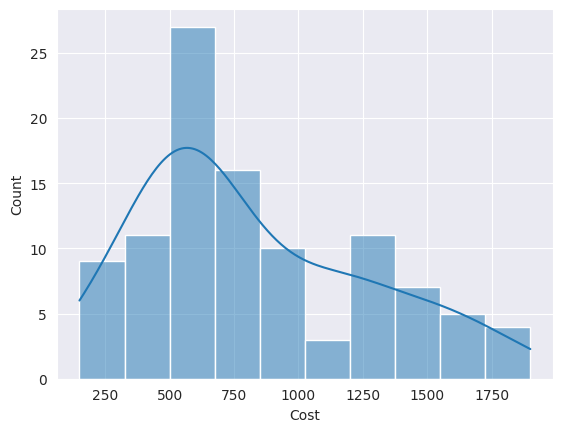

In [198]:
# Transform Your data
# Understanding distribution of cost column
sns.histplot(restaurant_features['Cost'], bins = 10, kde = True)
plt.show()

### 6. Data Scaling

In [199]:
# Scaling your data
# Scaling your data using Standard Scaler

# Initalize the Scaler
scaler = StandardScaler()

# Fit and transform the data
num_cols = ['Cost', 'Rating', 'Cuisine_Count']
scaled_df = restaurant_features.copy()
scaled_df[num_cols] = scaler.fit_transform(scaled_df[num_cols])

# Verifying Changes
scaled_df.head()

Cost    Rating North Indian Chinese  \
Restaurant                                                                
Beyond Flavours                -0.059848  0.933979            1       1   
Paradise                       -0.059848  1.391725            1       1   
Flechazo                        1.060935  1.348130            1       0   
Shah Ghouse Hotel & Restaurant -0.059848 -0.232184            1       1   
Over The Moon Brew Company      0.836779  0.999371            1       1   

                               Continental Biryani Fast Food Asian Italian  \
Restaurant                                                                   
Beyond Flavours                          1       0         0     0       0   
Paradise                                 0       1         0     0       0   
Flechazo                                 0       0         0     1       0   
Shah Ghouse Hotel & Restaurant           0       1         0     0       0   
Over The Moon Brew Company               1       0         0     1       0   

                               Desserts  ... Wraps Spanish Mexican Goan  \
Restaurant                               ...                              
Beyond Flavours                       0  ...     0       0       0    0   
Paradise                              0  ...     0       0       0    0   
Flechazo                              1  ...     0       0       0    0   
Shah Ghouse Hotel & Restaurant        0  ...     0       0       0    0   
Over The Moon Brew Company            0  ...     0       0       0    0   

                               Healthy Food Lebanese Malaysian Cuisine_Count  \
Restaurant                                                                     
Beyond Flavours                           0        0         0      2.553943   
Paradise                                  0        0         0      0.040668   
Flechazo                                  0        0         0      0.878426   
Shah Ghouse Hotel & Restaurant            0        0         0      1.716185   
Over The Moon Brew Company                0        0         0      1.716185   

                               Cost_Binned Rating_Binned  
Restaurant                                                
Beyond Flavours                          4             9  
Paradise                                 4            10  
Flechazo                                 7            10  
Shah Ghouse Hotel & Restaurant           4             7  
Over The Moon Brew Company               6             9  

[5 rows x 49 columns]

##### Which method have you used to scale you data and why?
I have used the standard scaler on all numerical columns to adjust the range of the data. This will help us standardize all the features, thus giving better results.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, dimensionality reduction was essential as we had expanded the cuisines column and one hot coded it, which resulted in the dataset have way too many features. This could cause the model to be less efficient, requires more computation energy and more time taking and not work the way we desire. Hence we try to reduce the features to a level where it is still retains the important information from the original dataset.

In [200]:
# DImensionality Reduction (If needed)
# DImensionality Reduction using PCA

# Initialize PCA
pca = PCA()

# Fit the data
pca_result = pca.fit(clustering_df)

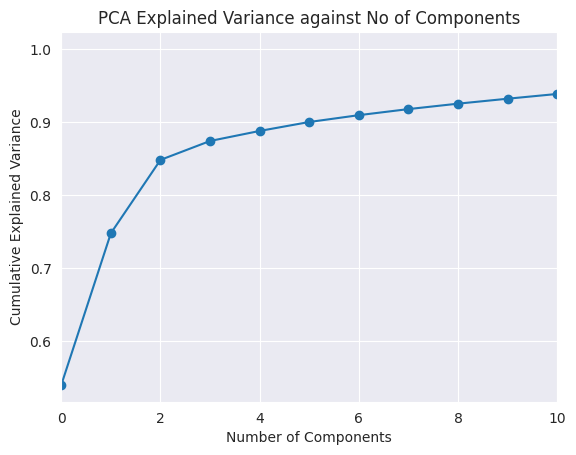

In [201]:
# Plotting the Cumulative Summation of the Explained Variance
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker = 'o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xlim(0,10)

# Added title and displayed the plot
plt.title('PCA Explained Variance against No of Components')
plt.show()

In [202]:
# Using 4 components as I want atleast 85% explained varaince

# Initializing PCA with 4 components
pca = PCA(n_components = 4)

# Fit the data
pca.fit(clustering_df)

# Calculate and print the cumulative explained variance by the 4 components
cumulative_explained_variance = np.sum(pca.explained_variance_ratio_)
print('Cumulative variance explained by 4 principal components: {:.2%}'.format(cumulative_explained_variance))

# Transform the original data to the principal component space
df_pca = pca.transform(clustering_df)

# Print the shape of the transformed data to understand its new dimensions
print('Shape of transformed data:', df_pca.shape)

Cumulative variance explained by 4 principal components: 87.41%
Shape of transformed data: (103, 4)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I have used PCA for dimensionality reduction. What Principal Component Analysis (PCA) does is feature extraction where is finds the patterns in the data that brings out the most variance. These patterns, known as principal components, are linear combinations of the original features that are uncorrelated with each other. By using the first few principal components, which account for the majority of the variation in the data, we can effectively reduce the dimensionality of the data while maintaining most of the important information.

I have used 4 Principal Components as I wanted a minimum threshold of variance explained higher than 85%. 4 components explains 87.41% of the data.

### 8. Data Splitting

In [203]:
# Split your data to train and test. Choose Splitting ratio wisely.

# Assigning X as Vectorized Reviews from TFI-DF matrix and Y as the Sentiment we are trying to achieve
X = tfidf_matrix
y = reviews_features['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7964, 16698)
(1991, 16698)
(7964,)
(1991,)


##### What data splitting ratio have you used and why?

I have used the 80:20 split. The reason I used this is because this gives us adequate data for the model to test without much variance or bias and sufficient data for us to use for testing.

### 9. Handling Imbalanced Dataset

Class Imbalance Ratio: 3.07


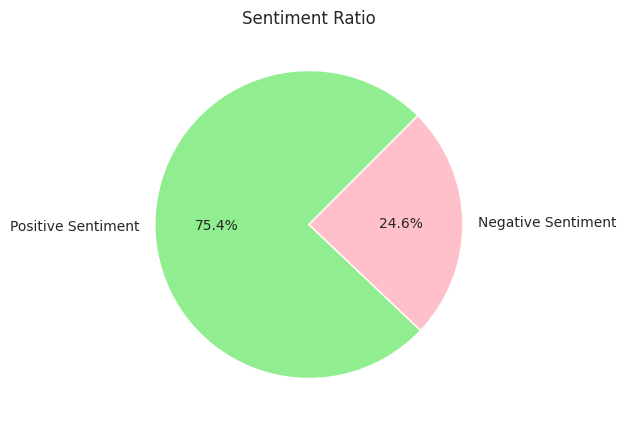

In [204]:
# Handling Imbalanced Dataset (If needed)
sentiment_ratio = reviews_features['Sentiment'].value_counts(normalize = True)

print('Class Imbalance Ratio:', round(sentiment_ratio[1]/sentiment_ratio[0],2))

label = ['Positive Sentiment', 'Negative Sentiment']
colors = ['lightgreen', 'pink']

plt.figure(figsize = (5,5))

sentiment_ratio.plot(kind = 'pie', autopct = '%1.1f%%', startangle = 45, labels = label, colors = colors)
plt.title('Sentiment Ratio')
plt.ylabel('')

plt.show()

##### Do you think the dataset is imbalanced? Explain Why.

There is an imbalance in the dataset by 3.07 times as suggested by the CIR (Class Imbalance Ratio). While there is an imbalance, it is considered as mild imbalance, so I will be using as it is, unless I get an error while Modelling

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

No Imbalance handling technique was used as checked by the CIR, we found mild imbalance which is in the acceptable range.

## ***7. ML Model Implementation***

### ML Model - 1

In [205]:
# ML Model - 1 - Topic Modelling with LDA

# Convert each list of strings in the 'Review' column to a single string
reviews = [' '.join(review) for review in sentiment_df['Review']]

stop_words = set(stopwords.words('english'))

# Add custom stopwords
custom_stopwords = set(["restaurant", "food", "service", "place", "order", "taste", "one","ordered","good","chicken"])
stop_words = stop_words.union(custom_stopwords)

# Preprocess the reviews to remove stopwords
def preprocess(text):
    return [word for word in simple_preprocess(text) if word not in stop_words]

# Tokenize each review using simple_preprocess
tokenized_df = [preprocess(doc) for doc in reviews]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(tokenized_df)

# Create a corpus of term-frequency counts
corpus = [dictionary.doc2bow(doc) for doc in tokenized_df]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=20)

# Print the topics
for topic in lda_model.print_topics(num_words = 10, num_topics = 5):
  words_split = topic[1].split(' + ')
  words = [word.split('*')[1] for word in words_split]
  print(f'Topic: {topic[0]}, Words: ', ', '.join(words))

Topic: 0, Words:  "time", "bad", "worst", "delivery", "even", "biryani", "quality", "experience", "zomato", "customer"
Topic: 1, Words:  "drink", "night", "table", "floor", "cream", "went", "music", "ice", "ambience", "area"
Topic: 2, Words:  "veg", "rice", "biryani", "dish", "paneer", "like", "starter", "spicy", "also", "fried"
Topic: 3, Words:  "buffet", "cake", "best", "try", "ambience", "chocolate", "amazing", "indian", "must", "menu"
Topic: 4, Words:  "great", "nice", "ambience", "staff", "awesome", "visit", "really", "best", "time", "amazing"


In [206]:
# Enable notebook display for pyLDAvis
pyLDAvis.enable_notebook()

# Prepare the visualization data for pyLDAvis
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)

# Display the visualization
pyLDAvis.display(vis_data)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [207]:
# Visualizing evaluation Metric Score chart
perplexity = lda_model.log_perplexity(corpus)
print('Perplexity:', perplexity)

coherence_model = CoherenceModel(model=lda_model, texts=tokenized_df, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print('Coherence Score:', coherence_score)

Perplexity: -7.7216455788557345
Coherence Score: 0.4935351187274345


The ML Model that we used is LDA or Latent Dirichlet Allocation. This model is used for Topic Modelling of text data. It is a generative probabilistic model that is used to find out underlying topics in a given group of documents. I have used Gensim over Sklearn as Gensim is designed to handle large-scale text corpora efficiently, making it suitable for processing large volumes of text data. Considering our data is an analysis of 10000 reviews, this library makes it easier for us to preprocess and run the model.

The evaluation metrics we have used are Perplexity and Coherence Score.

Perplexity: Perplexity is a measure of how well a probability model predicts a sample. In the context of topic modeling, lower perplexity indicates a better fit of the model to the data. We got a perplexity of -7.71.

Coherence: Coherence score measures the degree of semantic similarity between high scoring words in the topic. It's a more interpretable metric compared to perplexity because it correlates better with human judgment. We got a coherence score of 0.49 which is in the acceptable range

#### 2. Cross- Validation & Hyperparameter Tuning

In [208]:
from sklearn.model_selection import ParameterGrid

param_grid = {
    'num_topics': [4,5,6],
    'passes': [10, 20]
}

grid = list(ParameterGrid(param_grid))

def evaluate_model(params, corpus, dictionary):
  lda_model = LdaModel(
      corpus,
      num_topics = params['num_topics'],
      id2word = dictionary,
      passes = params['passes']
  )
  coherence_model = CoherenceModel(model=lda_model, texts=tokenized_df, dictionary=dictionary, coherence='c_v')
  coherence_score = coherence_model.get_coherence()
  return coherence_score

best_score = -np.inf
best_params = None

for params in ParameterGrid(param_grid):
  score = evaluate_model(params, corpus, dictionary)
  if score > best_score:
    best_score = score
    best_params = params
  print(f'Params: {params}, Coherence Score: {score}')

print('Best Parameters:', best_params)
print('Best Coherence Score:', best_score)

Params: {'num_topics': 4, 'passes': 10}, Coherence Score: 0.5182246441816101
Params: {'num_topics': 4, 'passes': 20}, Coherence Score: 0.5021748612608217
Params: {'num_topics': 5, 'passes': 10}, Coherence Score: 0.4657787351112824
Params: {'num_topics': 5, 'passes': 20}, Coherence Score: 0.48728134445190163
Params: {'num_topics': 6, 'passes': 10}, Coherence Score: 0.47669056756693967
Params: {'num_topics': 6, 'passes': 20}, Coherence Score: 0.48038342337030526
Best Parameters: {'num_topics': 4, 'passes': 10}
Best Coherence Score: 0.5182246441816101


##### Which hyperparameter optimization technique have you used and why?

The hyperparameter I used was ParameterGrid. ParameterGrid is a class in sklearn.model_selection that allows for an exhaustive search over specified parameter values for a model. It is used for hyperparameter tuning by generating all possible combinations of the given parameters. This is particularly useful when you want to explore different hyperparameter configurations to find the best model performance. I tried using this to figure the best number of topics and passes that would give us the highest Coherence Score.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There was a very negligible increase in the coherence score after applying the best hyperparameters from the results of ParameterGrid. Since this was taking up a lot of training time, and brought very little change, I am not using it.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

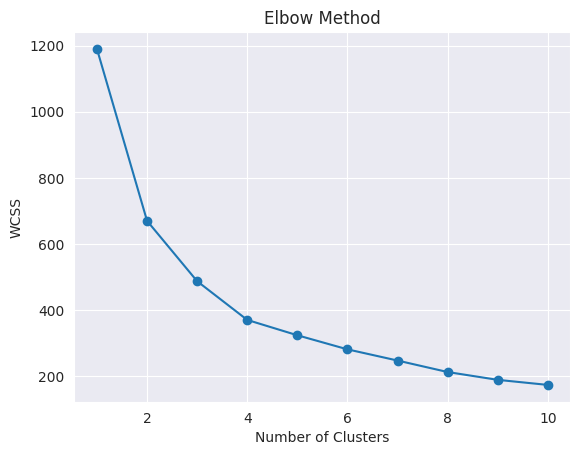

In [209]:
# Initialize and empty list to store within cluster sum of squares (wcss)
wcss = []

# Loop through 1 to 10 clusters
for i in range(1,11):
  # Initialize KMeans with current number of clusters
  km = KMeans(n_clusters = i, n_init = 10, random_state = 20)
  # Fit the kmeans to the data to calculate wcss
  km.fit(df_pca)
  # Append the wcss to the list
  wcss.append(km.inertia_)

# Plot the WCSS against the number of clusters to find the elbow bend
plt.plot(range(1,11) , wcss, marker = 'o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

# Add title and display the plot
plt.title("Elbow Method")
plt.show()

For n_clusters = 2, the average silhouette_score is : 0.41348661590010816
For n_clusters = 3, the average silhouette_score is : 0.4393292866680898
For n_clusters = 4, the average silhouette_score is : 0.327835023772118
For n_clusters = 5, the average silhouette_score is : 0.30957241482516684
For n_clusters = 6, the average silhouette_score is : 0.31817202776325154
For n_clusters = 7, the average silhouette_score is : 0.2373493154215429
For n_clusters = 8, the average silhouette_score is : 0.26641996748355007
For n_clusters = 9, the average silhouette_score is : 0.27111328532025897


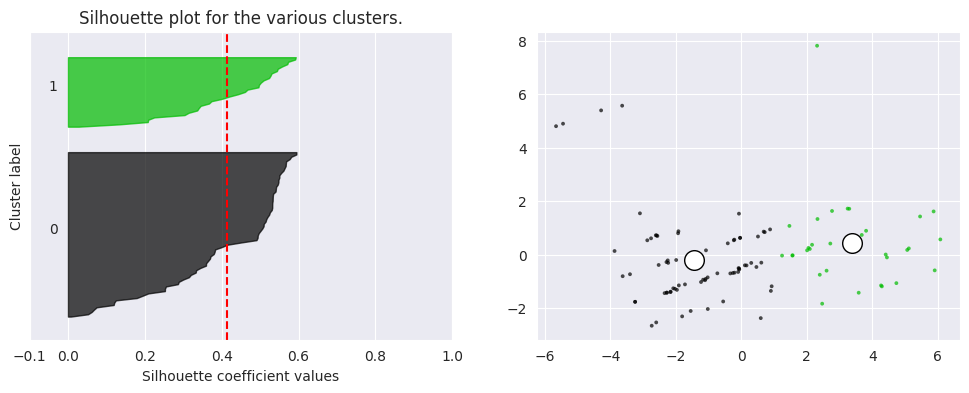

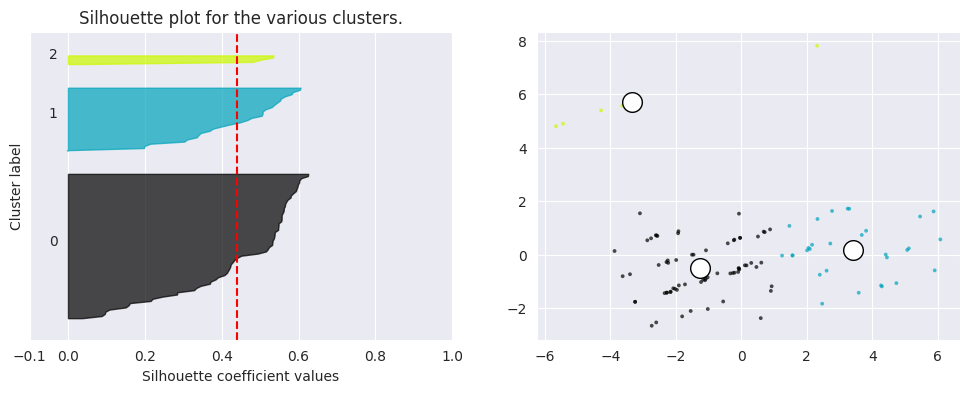

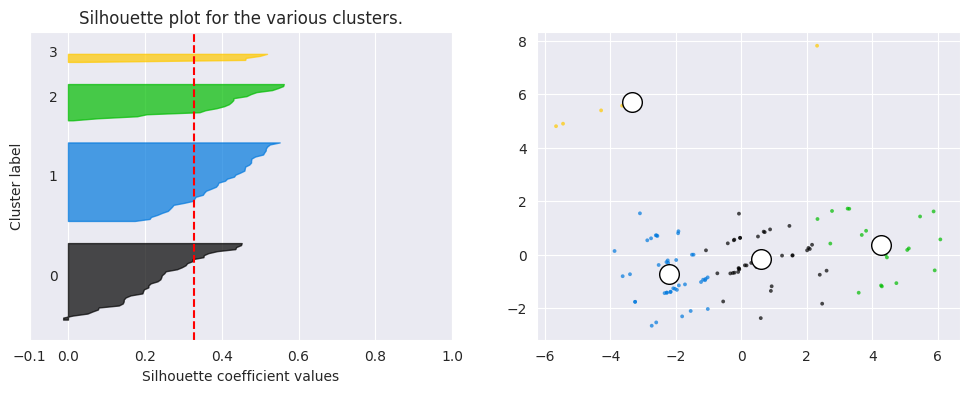

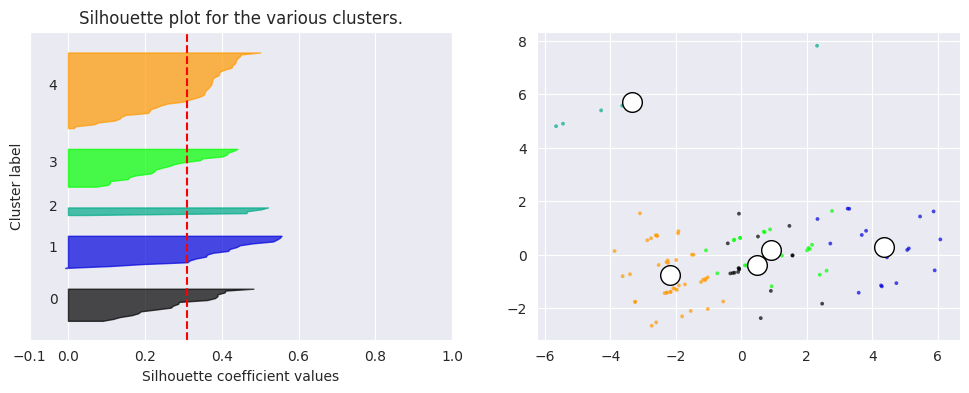

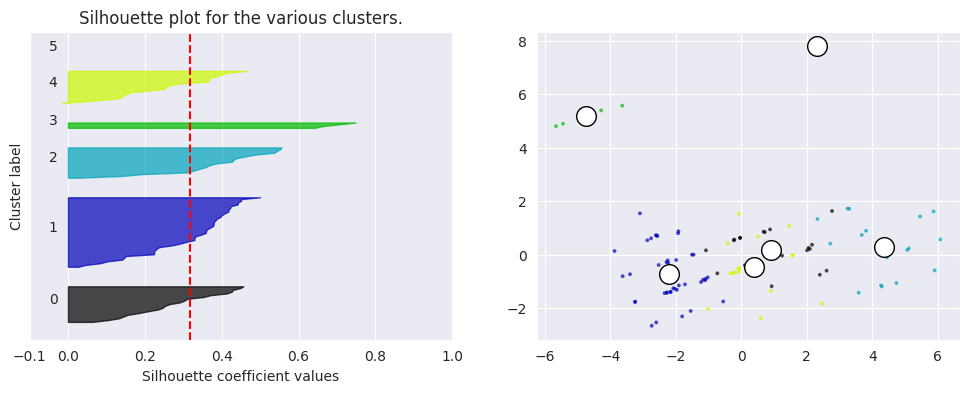

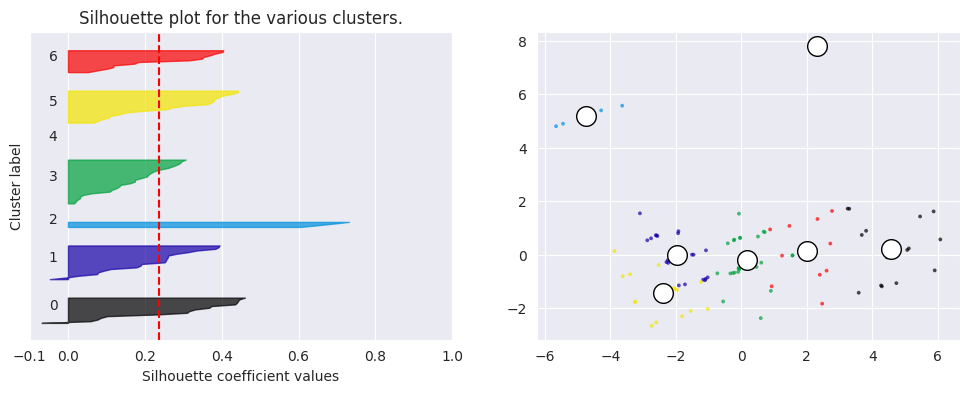

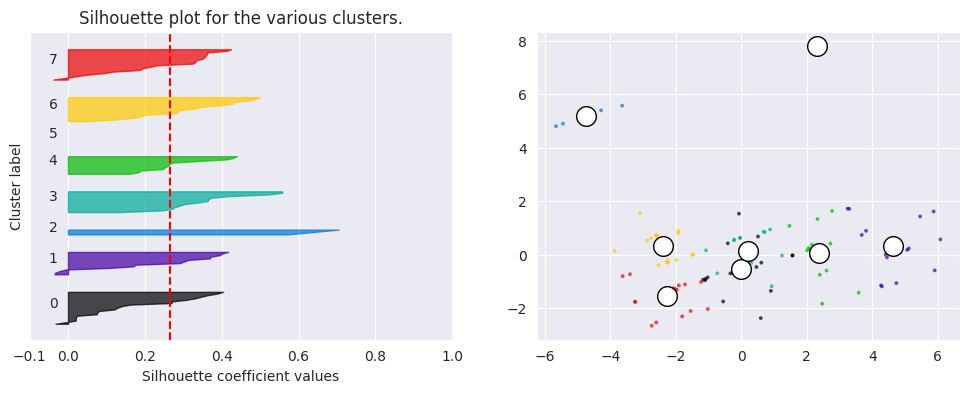

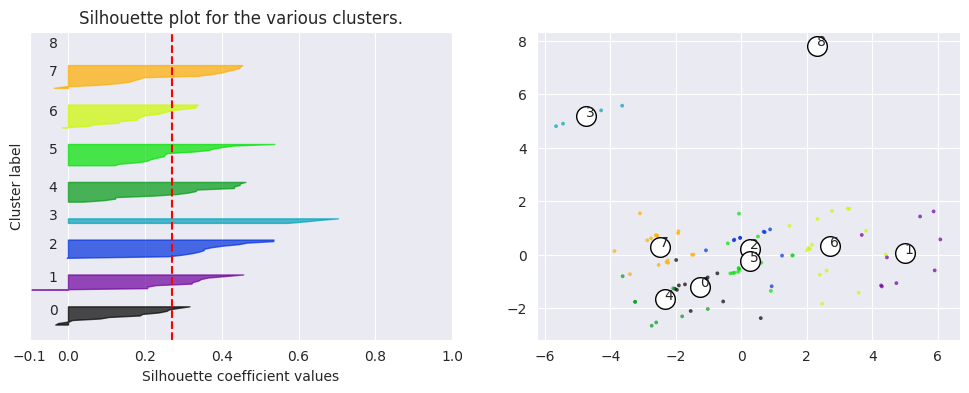

In [210]:
# Candidates for the number of clusters
parameters = list(range(2, 10))

# Initialize an empty list to store the silhouette scores
silhouette_avg_scores = []

# Loop through each number of clusters to evaluate and visualize
for n_clusters in parameters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 4)

    # 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=10)
    cluster_labels = clusterer.fit_predict(df_pca)

    # Silhouette score gives the average value for all the samples
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the y-axis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    # Use enumerate to get both index and value of centers
for i, c in enumerate(centers):
        # Annotate the cluster number instead of using it as a marker
        ax2.annotate(str(i), (c[0], c[1]), fontsize=10)

#### 2. Cross- Validation & Hyperparameter Tuning

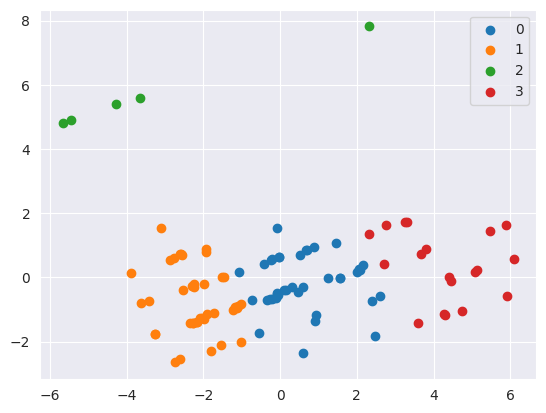

In [211]:
# ML Model - 1 Implementation

# Fit the Algorithm
kmeans = KMeans(n_clusters = 4 , n_init = 10, init = 'k-means++', random_state = 42)
kmeans.fit(df_pca)

# Predict on the model
label = kmeans.fit_predict(df_pca)
unique_labels = np.unique(label)

# Plot the clusters
for i in unique_labels:
  plt.scatter(df_pca[label == i, 0], df_pca[label == i, 1], label = i)

# Display the plot
plt.legend()
plt.show()

In [212]:
# Adding the clusters to our data for further analysis
restaurants_preprocessed['Clusters'] = label
restaurants_preprocessed.head()

Restaurant   Location  Cost  \
0                 Beyond Flavours  hyderabad   800   
1                        Paradise  hyderabad   800   
2                        Flechazo  hyderabad  1300   
3  Shah Ghouse Hotel & Restaurant  hyderabad   800   
4      Over The Moon Brew Company  hyderabad  1200   

                                            Cuisines  \
0  [Chinese, Continental, Kebab, European, South ...   
1                   [Biryani, North Indian, Chinese]   
2     [Asian, Mediterranean, North Indian, Desserts]   
3  [Biryani, North Indian, Chinese, Seafood, Beve...   
4  [Asian, Continental, North Indian, Chinese, Me...   

                                             Timings  Rating  Clusters  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)    4.28         0  
1                                     11 AM to 11 PM    4.70         0  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM    4.66         3  
3                                    12 Noon to 2 AM    3.21         0  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...    4.34         0

In [213]:
# Preparing data based on clusters

# Number of Restaurants in each
cluster_count = restaurants_preprocessed['Clusters'].value_counts().reset_index().rename(
    columns={'count':'Total_Restaurant'}).sort_values(by='Total_Restaurant')

# Average cost per cluster
cluster_count['Avg Cost'] = restaurants_preprocessed.groupby('Clusters')['Cost'].mean().apply(lambda x: round(x,2))

# Average rating per cluster
cluster_count['Avg Rating'] = restaurants_preprocessed.groupby('Clusters')['Rating'].mean().apply(lambda x: round(x,2))

cluster_count

Clusters  Total_Restaurant  Avg Cost  Avg Rating
3         2                 5   1544.74        3.99
2         3                19    650.00        0.00
1         0                39    441.25        3.38
0         1                40    894.87        3.63

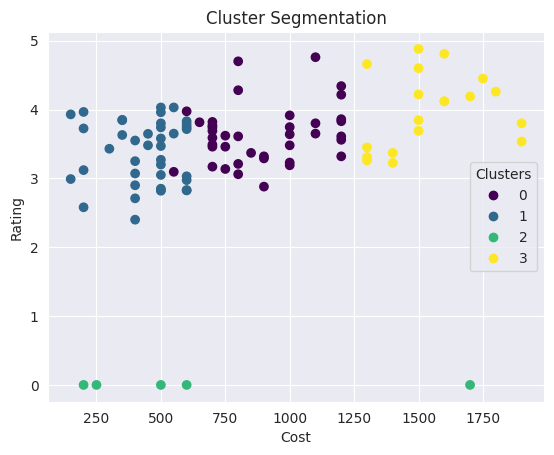

In [214]:
# Scatterplot showing relationship between Cost and Rating in different Clusters
scatter = plt.scatter(restaurants_preprocessed['Cost'],restaurants_preprocessed['Rating'], c = restaurants_preprocessed['Clusters'], cmap = 'viridis')
plt.xlabel('Cost')
plt.ylabel('Rating')
plt.title('Cluster Segmentation')

# Displaying the plot
plt.legend(*scatter.legend_elements(), title = 'Clusters')
plt.show()

In [215]:
# Adding the cluster values to reviews dataset
reviews_features = reviews_features.merge(restaurants_preprocessed[['Restaurant','Clusters']], on = 'Restaurant', how = 'left')
reviews_features.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  Review_Month  \
0  [ambience, good, food, quite, good, saturday, ...     5.0             5   
1  [ambience, good, pleasant, evening, service, p...     5.0             5   
2  [must, try, great, food, great, ambience, thnx...     5.0             5   
3  [soumen, da, arun, great, guy, behavior, since...     5.0             5   
4  [food, goodwe, ordered, kodi, drumstick, baske...     5.0             5   

   Review_Year  Review_Hour  Sentiment  Clusters  
0         2019           15          1       0.0  
1         2019           14          1       0.0  
2         2019           22          1       0.0  
3         2019           22          1       0.0  
4         2019           21          1       0.0

In [216]:
# Creating a new df to show the best rated restaurants in each cluster
cluster_restaurants = restaurants_preprocessed[['Clusters','Restaurant','Rating']].sort_values(by = ['Clusters','Rating'], ascending = False).reset_index(drop = True)
cluster_restaurants.head()

Clusters                       Restaurant  Rating
0         3        AB's - Absolute Barbecues    4.88
1         3                           B-Dubs    4.81
2         3                         Flechazo    4.66
3         3                   The Indi Grill    4.60
4         3  Zega - Sheraton Hyderabad Hotel    4.45

In [217]:
# Recommending Reviewers the best restaurants depending on their most liked restaurant

# Found each reviewer's most liked restaurant and the cluster it belongs
recommend = reviews_features.groupby('Reviewer').agg({'Rating': 'max', 'Restaurant':'max', 'Clusters': 'max'})
recommend.columns = ['Rating','Restaurant','Cluster']
recommend.reset_index(inplace = True)

# Found the best rated restaurants in the same cluster
suggestions = []
for index, row in recommend.iterrows():
  cluster = row['Cluster']
  best_restaurants = cluster_restaurants[cluster_restaurants['Clusters'] == cluster].head()
  suggestions.append(best_restaurants['Restaurant'].tolist())

# Adding the suggestions to the dataframe
recommend['Suggestions'] = suggestions

# Verifying results
recommend.head()

Reviewer  Rating                       Restaurant  \
0                    #FOODPORN     5.0  Zega - Sheraton Hyderabad Hotel   
1          #chloesviews // CAH     5.0                          eat.fit   
2                         $ign     4.0                            SKYHY   
3                     4mybanti     2.0                       Ulavacharu   
4  @FuloriBinaChutneyKaiseBani     5.0                 Chinese Pavilion   

   Cluster                                        Suggestions  
0      3.0  [AB's - Absolute Barbecues, B-Dubs, Flechazo, ...  
1      1.0  [NorFest - The Dhaba, Udipi's Upahar, KS Baker...  
2      3.0  [AB's - Absolute Barbecues, B-Dubs, Flechazo, ...  
3      3.0  [AB's - Absolute Barbecues, B-Dubs, Flechazo, ...  
4      0.0  [3B's - Buddies, Bar & Barbecue, Paradise, Ove...

##### Which hyperparameter optimization technique have you used and why?

After performing Kmeans Clustering, we can note the above graph to best understand how the clusters have been distinguished.

- Cluster 0: **Budget-Friendly**: Represents affordable eateries with good ratings(2.5 - 4) and low cost(< 250).
- Cluster 1: **Local Favorites** : Represents popular choices with awesome ratings(3-5) and moderate cost(700 - 1250).
- Cluster 2: **Fine Dining Delights** : Represents fine dining establishments with high ratings (3-5) and higher cost (1250 +).
- Cluster 3: **Cautionary Selections**: Represents places to avoid due to lower ratings.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The ML Model I have used here is KMeans clustering. With this we try to segregate the dataset into different groups that are unique to each other.

To do so, I first used the elbow method and also the silhouette method to find the ideal number of clusters. We can see that 3 clusters shows us an ideal segregation of clusters. After that we fit our dataset we got after performing PCA. With this we got the label for each cluster and we assigned that to our original dataset. Once I got that, I used that data to show new data based on the clusters.

This data can be used to answer a lot of questions related to restaurant segmentation like what is the price range for these clusters, what kind of cuisines are generally served, what is the average rating. Such data can be used for marketing and overall business growth.

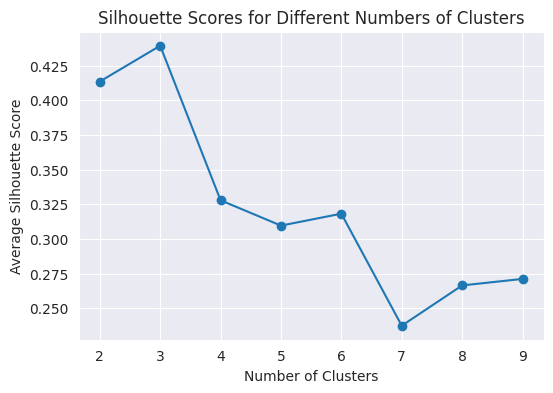

In [218]:
# Visualizing evaluation Metric Score chart
# Plot silhouette average scores to find the optimal number of clusters
plt.figure(figsize=(6, 4))
plt.plot(parameters, silhouette_avg_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [219]:
# Defined a function to run different models for comparision
def score_calculator(model, X_train, y_train, X_test, y_test):
  # Fit the model
  model.fit(X_train, y_train)

  # Predict on the model
  y_pred = model.predict(X_test)

  # Calculate Metric Scores
  acc_score = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)

  # Create a confusion Matric
  cm = confusion_matrix(y_test, y_pred)
  plt.imshow(cm, cmap = 'Blues')

  class_names = ['Positive', 'Negative']
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)

  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i,j], horizontalalignment = 'center', color = 'white' if cm[i,j] > thresh else 'black')

  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title('Confusion Matrix')

  print(cm)
  return acc_score, precision, recall, f1, roc_auc

# Defined a function to present the metrics
def score_table(model, x_train, y_train, x_test, y_test):
  acc_score, precision, recall, f1, roc_auc = score_calculator(model, x_train, y_train, x_test, y_test)
  table = [['Model', model],
           ['Accuracy Score', acc_score],
           ['Precision', precision],
           ['Recall', recall],
           ['F1 Score', f1],
           ['ROC AUC Score', roc_auc]]
  metric_df = pd.DataFrame(table, columns = ['Metric', 'Score']).set_index('Metric')
  return metric_df

In [220]:
# Defined functions to preprocess and predict on new data

# Function to preprocess new text
def preprocess_review(text):
    text = contractions.fix(text)
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    words = word_tokenize(text)
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Function to predict sentiment of new text
def predict_sentiment(review, model):
    cleaned_review = preprocess_review(review)
    vectorized_review = tfidf.transform([cleaned_review])
    prediction = model.predict(vectorized_review)
    return 'Positive' if prediction[0] == 1 else 'Negative'

[[ 341  168]
 [  46 1436]]


Score
Metric                              
Model           LogisticRegression()
Accuracy Score              0.892516
Precision                   0.895262
Recall                      0.968961
F1 Score                    0.930655
ROC AUC Score               0.819451

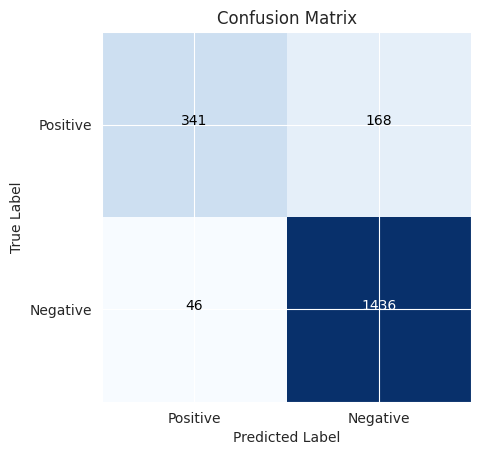

In [221]:
# Visualizing evaluation Metric Score chart for Logistic Regression

LR = LogisticRegression()
score_table(LR, X_train, y_train, X_test, y_test)

[[ 367  142]
 [  77 1405]]


Score
Metric                                                           
Model           XGBClassifier(base_score=None, booster=None, c...
Accuracy Score                                           0.890005
Precision                                                0.908209
Recall                                                   0.948043
F1 Score                                                 0.927699
ROC AUC Score                                            0.834532

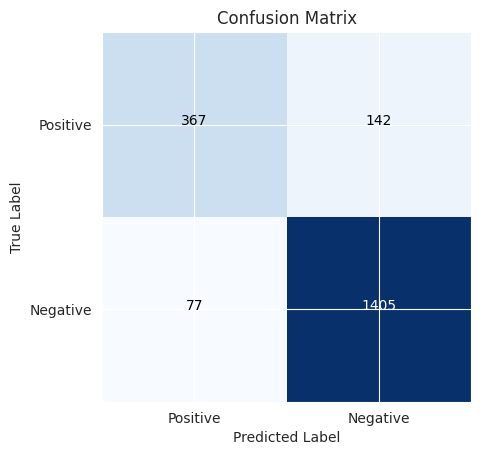

In [222]:
# Visualizing evaluation Metric Score chart for XGBoost Classifier
XGB = XGBClassifier()
score_table(XGB, X_train, y_train, X_test, y_test)

In [223]:
# Testing our model on unseen sample data
test_reviews = [
    "This restaurant was amazing! The food was delicious and the service was fast.",
    "Very disappointed. The portions were small and overpriced.",
    "The ambiance was great, and the food was delicious. Highly recommend this place!",
    "Amazing experience! The staff was friendly and the service was quick.",
    "Horrible experience. Will not be coming back here again.",
    "Loved the variety in the menu. Everything we ordered was perfect!",
    "Great place to dine with family. The desserts were particularly good.",
    "The food was cold and tasteless. Not worth the price at all.",
    "Terrible experience. The service was slow and the staff was rude.",
    "The restaurant was too noisy and the seating was uncomfortable.",
    "Fantastic service and the best steak I've ever had!"
]

# Comparing results of both models on sample data
sample_reviews = pd.DataFrame({'Review': test_reviews})
sample_reviews['LR_Sentiment'] = sample_reviews['Review'].apply(lambda x: predict_sentiment(x, LR))
sample_reviews['XGB_Sentiment'] = sample_reviews['Review'].apply(lambda x: predict_sentiment(x, XGB))
sample_reviews

Review LR_Sentiment  \
0   This restaurant was amazing! The food was deli...     Positive   
1   Very disappointed. The portions were small and...     Negative   
2   The ambiance was great, and the food was delic...     Positive   
3   Amazing experience! The staff was friendly and...     Positive   
4   Horrible experience. Will not be coming back h...     Negative   
5   Loved the variety in the menu. Everything we o...     Positive   
6   Great place to dine with family. The desserts ...     Positive   
7   The food was cold and tasteless. Not worth the...     Negative   
8   Terrible experience. The service was slow and ...     Negative   
9   The restaurant was too noisy and the seating w...     Positive   
10  Fantastic service and the best steak I've ever...     Positive   

   XGB_Sentiment  
0       Positive  
1       Negative  
2       Positive  
3       Positive  
4       Negative  
5       Positive  
6       Positive  
7       Negative  
8       Negative  
9       Positive  
10      Positive

In [224]:
# Running our Logistic Regression Model (better F1 Score) to our data
sentiment_df = merged.copy()
sentiment_df['Sentiment'] = sentiment_df['Review'].apply(lambda x: predict_sentiment(x, LR))
sentiment_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                 Time  Pictures  Review_Count  Followers  Review_Year  \
0 2019-05-25 15:54:00         0             1          2         2019   
1 2019-05-25 14:20:00         0             3          2         2019   
2 2019-05-24 22:54:00         0             2          3         2019   
3 2019-05-24 22:11:00         0             1          1         2019   
4 2019-05-24 21:37:00         0             3          2         2019   

    Location  Cost                                        Collections  \
0  hyderabad   800  [Food Hygiene Rated Restaurants in Hyderabad, ...   
1  hyderabad   800  [Food Hygiene Rated Restaurants in Hyderabad, ...   
2  hyderabad   800  [Food Hygiene Rated Restaurants in Hyderabad, ...   
3  hyderabad   800  [Food Hygiene Rated Restaurants in Hyderabad, ...   
4  hyderabad   800  [Food Hygiene Rated Restaurants in Hyderabad, ...   

                                            Cuisines  \
0  [Chinese, Continental, Kebab, European, South ...   
1  [Chinese, Continental, Kebab, European, South ...   
2  [Chinese, Continental, Kebab, European, South ...   
3  [Chinese, Continental, Kebab, European, South ...   
4  [Chinese, Continental, Kebab, European, South ...   

                                         Timings  num_cuisines Sentiment  
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)             6  Positive  
1  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)             6  Positive  
2  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)             6  Positive  
3  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)             6  Positive  
4  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)             6  Positive

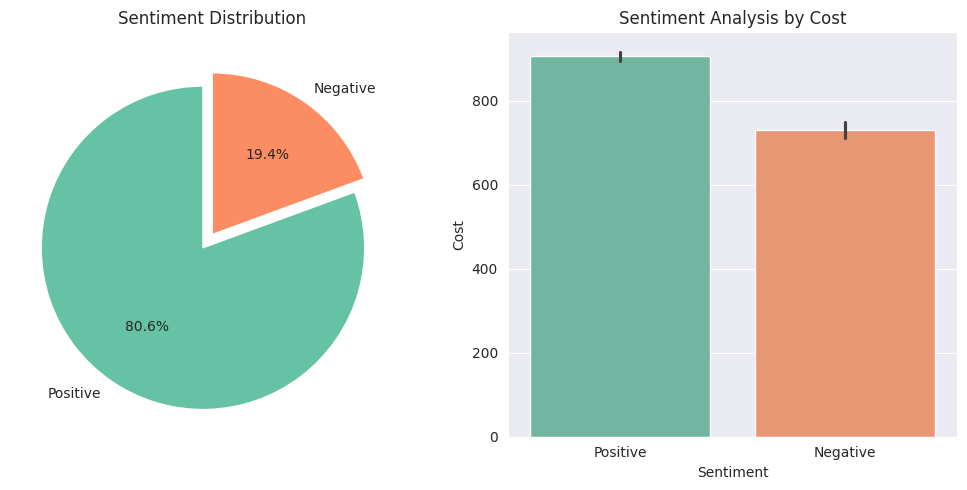

In [225]:
# Value Counts of each sentiment after running the model
value_counts = sentiment_df['Sentiment'].value_counts()
plt.figure(figsize=(10, 5))

# Subplot 1: Pie plot to show sentiment distribution
plt.subplot(1,2,1)
plt.pie(value_counts, labels=value_counts.index, startangle = 90, autopct='%1.1f%%', colors = sns.color_palette('Set2'), explode = (0.1, 0))
plt.title('Sentiment Distribution')

# Subplot 2: Bar plot to show sentiment analysis by cost
plt.subplot(1,2,2)
sns.barplot(x = 'Sentiment', y = 'Cost', data = sentiment_df, hue = 'Sentiment', palette = 'Set2')
plt.title('Sentiment Analysis by Cost')

# Displaying out plot
plt.tight_layout()
plt.show()

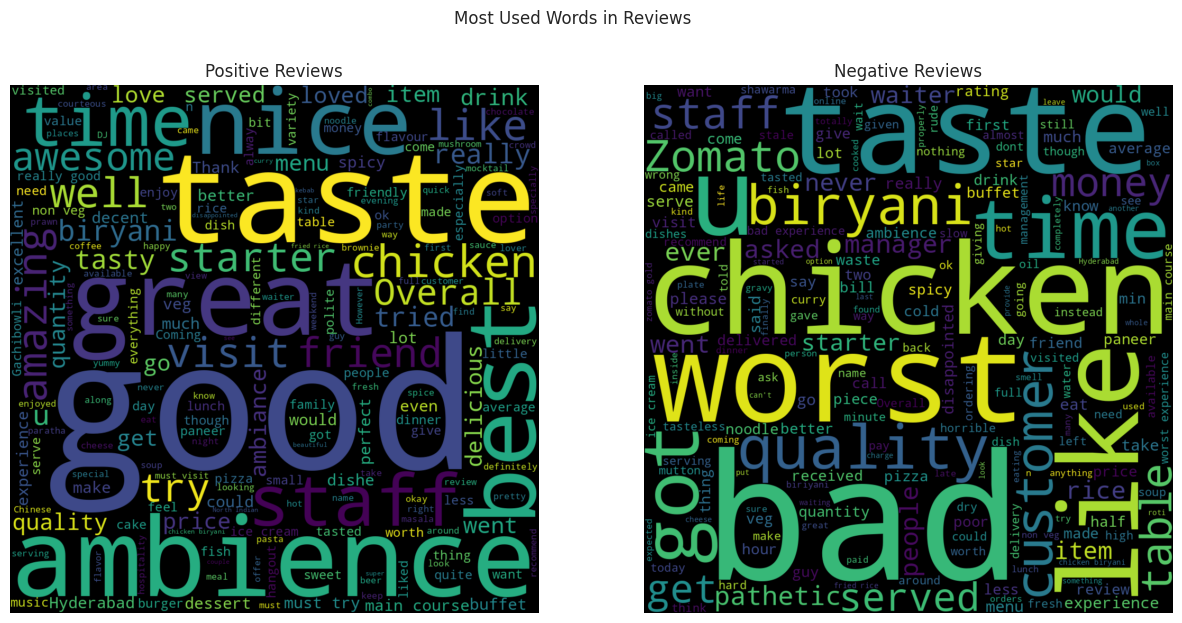

In [226]:
# Wordcloud to show most used words in for each sentiment
stopwords = nltk.corpus.stopwords.words('english')

# Creating a wordcloud for positive sentiments
positive_reviews = ''.join(sentiment_df[sentiment_df['Sentiment']=='Positive']['Review'])
stopwords.extend(['food','place','ordered','service','restaurant','order', 'also', 'one'])
wordcloud_pos = WordCloud(stopwords = stopwords, width = 1000, height = 1000).generate(positive_reviews)

# Creating a wordcloud for negative sentiments
negative_reviews = ''.join(sentiment_df[sentiment_df['Sentiment']=='Negative']['Review'])
stopwords.extend(['good','even'])
wordcloud_neg = WordCloud(stopwords = stopwords, width = 1000, height = 1000).generate(negative_reviews)

plt.figure(figsize = [15,7])

# Subplot 1: Positive Reviews Wordcloud
plt.subplot(1,2,1)
plt.imshow(wordcloud_pos, interpolation = 'bilinear')
plt.axis('off')
plt.title('Positive Reviews')

# Subplot 2: Negative Reviews Wordcloud
plt.subplot(1,2,2)
plt.imshow(wordcloud_neg, interpolation = 'bilinear')
plt.axis('off')
plt.title('Negative Reviews')

# Added a title and displaying out plot
plt.suptitle('Most Used Words in Reviews')
plt.show()

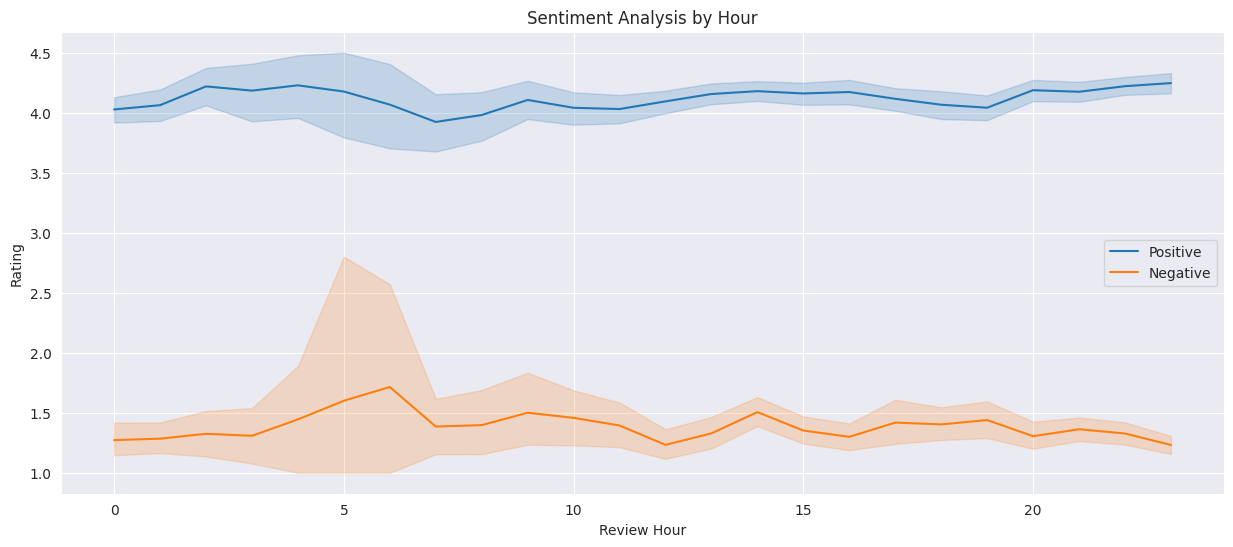

In [227]:
# Line Chart to show sentiments given per hour of the day
plt.figure(figsize = (15,6))

# Got the Review Hour column from time
sentiment_df['Review Hour'] = sentiment_df['Time'].dt.hour

# Creating our line chart
sns.lineplot(x = 'Review Hour', y = 'Rating', hue = 'Sentiment', data = sentiment_df)
plt.legend(loc = 'center right')

# Added a title and displaying our chart
plt.title('Sentiment Analysis by Hour')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The ML Model that I used is logistic regression. Logistic Regression is used for binary classification problems. Unlike linear regression, this is generally used to get discrete classes, like 0 and 1 or Positive and Negative, as outputs.

In our case, we created a dataset where we took all the reviews given by 9999 reviewers, cleaned the text data and converted it into a TFI-DF matrix. This matrix divides each work and understands how each word is affecting the entire dataset.

Once we got the matrix, we divided it into train and test with 80-20 ratio. We fit the Logistic Regression to the dataset. Once that was done, we tested the data with multiple metrics to understand the performance of our model. Here are the results:

- Accuracy Score: 89.25%
- Precision: 89.52%
- Recall: 96.89%
- F1 Score: 93.06%
- ROC-AUC Score: 81.95%

Once that was done, we ran the model with out initial dataset, to get a complete data picture with the new found sentiment. With this new data, we made a couple of visualizations to get more insights on the data.

In [228]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

Best parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best score: 0.9494628900124467
[[ 389  120]
 [  68 1414]]


Score
Metric                                                      
Model           LogisticRegression(C=10, solver='liblinear')
Accuracy Score                                      0.905575
Precision                                           0.921773
Recall                                              0.954116
F1 Score                                            0.937666
ROC AUC Score                                        0.85918

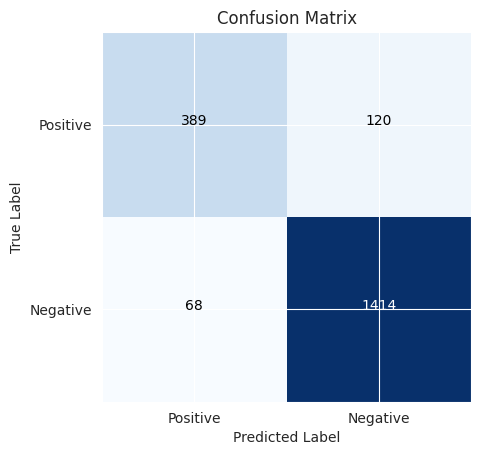

In [229]:
# Hyperparameter Tuning with GridSearchCV

# Defining our parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'max_iter': [100, 500, 1000]
}

# Initialize GridSearchCV with LogisticRegression model and parameter grid
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring = 'roc_auc')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best model from the search
best_model = grid_search.best_estimator_

# Evaluate the best model using our scoring function
score_table(best_model, X_train, y_train, X_test, y_test)

##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV to optimize the hyperparameters of my logistic regression model. I used this technique since the number of combinations of hyperparameters were less so we could go through each of the combination to understand our data and which combination would give us the highest ROC-AUC score. After performing 30 combinations, once with Recall and once with ROC-AUC, I could see that the combination with best recall of 99%, all other metrics had fallen which could mean an increase of false positives. I tried running the same code with ROC-AUC, I could see that the best combination that had a recall of 97% was the same as our results before hyperparameter tuning.

I tried using RandomizedSearchCV on my hyperparameters for XGBoost model, but the training was taking too long, despite decreasing the number of hyperparameters. I wanted to use RandomizedSearch over GridSearch as the model is a little complex, and the the number of combinations were higher. Randomized Search would take only a select number of random combinations to perform the hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Before performing hyperparameter tuning on our logistic regression model, the metric scores that we found were:

- Accuracy Score 0.892516
- Precision 0.895262
- Recall 0.968961
- F1 Score 0.930655
- ROC AUC Score 0.819451

After performing hyperparameter tuning with Recall as our scoring parameter:

- Accuracy Score 0.806128
- Precision 0.795577
- Recall 0.995277
- F1 Score 0.884293
- ROC AUC Score 0.62534

Here I could see that only Recall had increased and not any other metrics, this could mean that there was an increase in the number of false positives.

So I ran the code again with ROC-AUC as my scoring paramater, only to see the results same as our initial code without running the GridSearchCV.

- Accuracy Score 0.892516
- Precision 0.895262
- Recall 0.968961
- F1 Score 0.930655
- ROC AUC Score 0.819451

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Evaluation Metrics are best chosen depending the use-case scenario. I used many metrics while running all of my models.

For the **LDA model**, I used Perplexity and **Coherence Score**. Among this, I found Coherence Score more useful as it measures the semantic coherence of the topics and aligns well with human judgment.

For the **clustering model**, I used **Silhouette Score** and found it more useful as provides insight into how well clusters are defined and how well each point is assigned to its cluster, which is basically the goal of a clustering model.

For the **Sentiment Analysis Model**, I used metrics like precision, recall, **F1-score**, ROC-AUC Score and accuracy. Among these, I find F1-Score to give use the best estimator for a positive business impact as it gives us a holistic view of overall model performace as it balances between precision and recall.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

For **Topic Modelling**, I chose **Latent Dirichlet Allocation** **or LDA** as this model is best used when you want to group words of similar topic in a document together. This gives us the best estimate of what different reviewers are talking about.

For **Restaurant Clustering**, I chose the **KMeans Clustering** as this model segregates different restaurant features and groups them into similar instances of each feature. This helps us easily identify the cluster to which that restaurant belongs. With this data, you can suggest users of one restaurant some more restaurants in the same cluster.

For **Sentiment Analysis of Reviews**, I chose the **logistic regression** as this model is best to understand people giving a certain rating, give out what kinds of review. This helps us understand and predict how most existing and new users feel about the restaurants they are dining at.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**Sentiment Analysis with Logistic Regression**

**Model Explanation**:

Logistic regression is a supervised learning algorithm used for binary classification tasks. It predicts the probability that a given input belongs to a particular class (positive or negative sentiment). It is useful for understanding sentiment because it can handle large feature sets and provide probabilities for each class.

**Feature Importance:**

For logistic regression, feature importance can be interpreted through the model's coefficients. Tools like SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) can provide insights into how each feature influences the prediction.

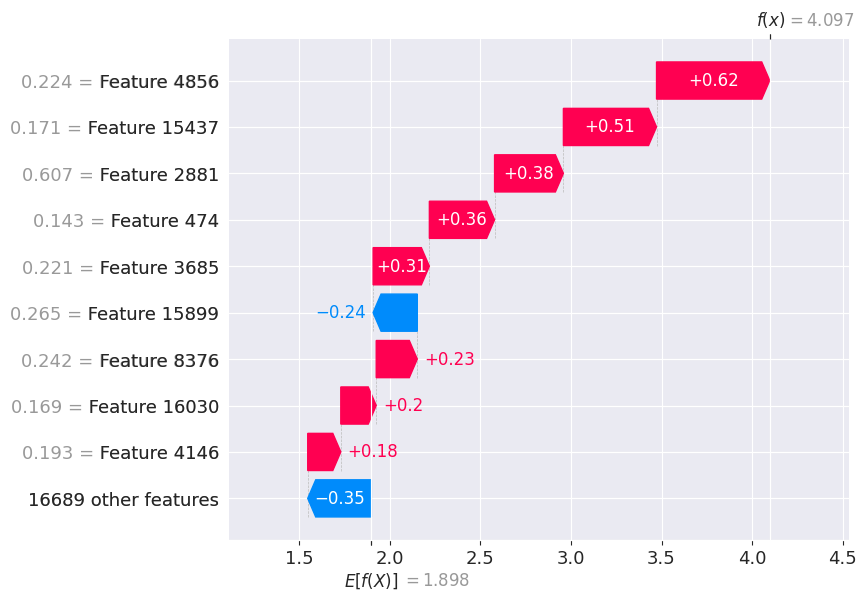

In [230]:
# Create a SHAP explainer
explainer = shap.LinearExplainer(LR, X_train)
shap_values = explainer(X_test)

# Summary plot
shap.plots.waterfall(shap_values[0])

The code above generates a waterfall plot for the first abalone in our dataset, illustrating the SHAP values for each feature. These values indicate how much each feature has increased or decreased the predicted number of rings for this specific abalone.

On the x-axis, the base value is E[f(x)] = 1.898, and the final value is f(x) = 4.097. The SHAP values represent the contributions of individual features between these two points.

Each observation (abalone) in our dataset will have its unique waterfall plot, interpreted similarly. In each case, the SHAP values show how much each feature contributed to the model's prediction compared to the average prediction. Large positive or negative SHAP values signify that the feature had a significant impact on the model's prediction.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [231]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [232]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

We performerd Topic Modelling, Clustering and sentiment analysis on a dataset of customer reviews for the food delivery service Zomato. The purpose of this analysis was to understand the customer's experience and gain insights about their feedback.

**Clustering** was applied on all the restaurants present in the dataset based on various features each restaurant portrayed, and it was found that the customers were grouped into 4 clusters:

- **Budget-Friendly**: Represents affordable eateries with good ratings and low cost.
- **Local Favorites**: Represents popular choices with awesome ratings and moderate cost.
- **Fine Dining**: Represents fine dining establishments with high ratings and higher cost.
- **Cautionary Selections**: Represents places to avoid due to lower ratings.

This provided a general understanding of restaurants, with the positive cluster indicating the diffrence between each of these restaurants.

With the help of this clusters, we could also provide suggestions to different reviewers based on their Sentiment.

**Sentiment analysis** was then applied to classify the review text as positive or negative, depending on the words used by each reviewer. This provided a more detailed understanding of customer feedback and helped to identify specific areas where the service could be improved.

This analysis provided valuable insights into the customer's experience with Zomato, and it could be used to guide future business decisions and improve the service.

Other important discoveries during analysis are -

- AB's - Absolute Barbecues, show maximum engagement as it has maximum number of rating on average and Hotel Zara Hi-Fi show lowest engagement as has lowest average rating.

- North Indian food followed by chinese are the most in- demand food as sold by most of the restaurants while the most expensive cuisine is Modern Indian

- Great Buffets is the most frequently used tags and Ramzaan Mubarak and Sunday Brunch are the most expensive tags.

- Satwinder singh is the most popular critic with 12500+ followers and gives out and average of 3.8 rating.

- Collage - Hyatt Hyderabad Gachibowli is most expensive restaurant in the locality which has a price of 2800 for order and has 3.5 average rating. Hotels like Amul and Mohammedia Shawarma are least expensive with price of 150 and has 3.9 average rating.

Some recommendation based on the analysis ▶

- Based on negative reviews like some focused on issues with delivery time or food quality, the company should prioritize addressing these issues to improve customer satisfaction.

- Based on the clustering, we can give better recommendations to people not satisfied with one restaurant

- Also use the clustering results to target specific customer segments and tailor marketing and promotional efforts accordingly.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***